<a href="https://colab.research.google.com/github/ShahidIIM/Evaluation_Project/blob/main/Bike_Sharing_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bike Sharing Demand Prediction

# **Project Summary**

This Seoul Bike Sharing Demand Prediction machine learning project aims to predict demand for bike-sharing based on historical data. The dataset used contains data from a bike-sharing system including the date, hour, weather conditions, temperature, and the number of bikes rented.

The aim of the project is to use this data to build a predictive model that can accurately estimate bike rental demand for any given hour. The model will be evaluated on its accuracy in predicting the number of bikes rented during a given hour.

The data set included Rental bike information. As part of the analysis, descriptive statistics were calculated for each variable, and visualizations were created to explore the relationships between various variables. To get insight from the dataset, we built a variety of charts, including a distplot, count plot, bar plot, line plot, heatmap, and boxplot.

Dataset for rented bikes with 8760 observations and 14 variables. These include Date, Rented Bike Count, Hour, Temperature (°C), Humidity (%), Wind speed (m/s, Visibility (10m), Dew point temperature, Solar Radiation, Rainfall (mm), Snowfall (cm), Seasons, Holiday, and Functioning Day. The parse_date() method was used to transform the feature date from its original object form to datetime64.

There are no duplicate values in the dataset. Additionally, there are no null or missing values in the dataset. 3 variables in the dataset Seasons, Holidays, and Functional Day are categorical variables, however, the remaining 11 variables are all of a numerical character. The Outliers found for Rented Bike Count, Wind speed (m/s), Solar Radiation (MJ/m2), Rainfall (mm), and Snowfall (cm). It is advisable to omit the columns labeled "Rainfall (mm)" and "Snowfall (cm)" because of their flat interquartile ranges. We eliminated outliers from Rented Bike Count, Wind speed (m/s), and Solar Radiation (MJ/m2) by using the interquartile range.

We delete the original Date variable from the dataset and replace it with new variables that include the day, month, and year that we extracted from the Date variable. The dataset is now prepared for analysis.

We also verified the presumptions of the regression machine learning model. We restore the distribution of the features Rented Bike Count, Wind speed (m/s), Solar Radiation (MJ/m2), Visibility (10 m), Rainfall (mm), and Snowfall (cm) to normal using log and square root transformation. We also check to see if there is a linear relationship between the independent and dependent variables.

Furthermore, we use a heatmap and the variance inflation factor to examine multicollinearity in independent variables (VIF). Due to their high VIFs, we eliminated the variables year, dew point temperature (°C), and humidity (%). Once categorical variables like seasons, holidays, and working days were encoded, our dataset was ready to be used with a machine-learning model.

To make it easier for a model to learn and understand the problem, we divided the dataset into dependent and independent features and scaled them to the same length. Then we implement machine learning models like linear regression, Lasso (L1), Ridge (L2), ElasticNet, Decision Tree regressors, Random Forest, and XGBoost regression. We obtained a high accuracy of 0.9026 and a low root mean squared error of 3.80 from the XGBoost model, become final optimal model for prediction.

The Functioning Days, Rainfall (mm), and Seasons variables have a significant influence on the XBoost model, according to our plot of feature significance. Additionally, we explain our XGBoost model using SHAP.

Some difficulties faced during the implementation of the model include data accuracy and data integration. Additionally, the model may require extensive tuning and testing to ensure the accuracy and reliability of the predictions. Lastly, the model may need to be regularly updated in order to keep up with changes in the environment or bike-rental patterns.

# **Problem Statement**

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy.stats import norm
from tabulate import tabulate
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn import metrics
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

import graphviz
from sklearn.tree import export_graphviz
sns.set_style('darkgrid')

#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Loading Dataset
link = "/content/SeoulBikeData.csv"
df = pd.read_csv(link, parse_dates=['Date'],encoding="ISO-8859-1")
df

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0    2017-01-12                254     0             -5.2           37   
1    2017-01-12                204     1             -5.5           38   
2    2017-01-12                173     2             -6.0           39   
3    2017-01-12                107     3             -6.2           40   
4    2017-01-12                 78     4             -6.0           36   
...         ...                ...   ...              ...          ...   
8755 2018-11-30               1003    19              4.2           34   
8756 2018-11-30                764    20              3.4           37   
8757 2018-11-30                694    21              2.6           39   
8758 2018-11-30                712    22              2.1           41   
8759 2018-11-30                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
0     No Holiday             Yes  
1     No Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
...          ...             ...  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes  

[8760 rows x 14 columns]

In [7]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-01-12                254     0             -5.2           37   
1 2017-01-12                204     1             -5.5           38   
2 2017-01-12                173     2             -6.0           39   
3 2017-01-12                107     3             -6.2           40   
4 2017-01-12                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [8]:
df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755 2018-11-30               1003    19              4.2           34   
8756 2018-11-30                764    20              3.4           37   
8757 2018-11-30                694    21              2.6           39   
8758 2018-11-30                712    22              2.1           41   
8759 2018-11-30                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

## Exploratory Data Analysis(EDA)

In [9]:
# Checking shape of the dataset
df.shape

(8760, 14)

In [10]:
# Checking columns name of dataset
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [11]:
# Basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [12]:
# Bsic description of Dataset
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

In [13]:
# Checking for null values
count_null=pd.DataFrame(df.isna().sum()).rename(columns={0:'number_of_nulls_values'})
count_null

number_of_nulls_values
Date                                            0
Rented Bike Count                               0
Hour                                            0
Temperature(°C)                                 0
Humidity(%)                                     0
Wind speed (m/s)                                0
Visibility (10m)                                0
Dew point temperature(°C)                       0
Solar Radiation (MJ/m2)                         0
Rainfall(mm)                                    0
Snowfall (cm)                                   0
Seasons                                         0
Holiday                                         0
Functioning Day                                 0

In [14]:
# Checking for duplicate values
count_duplicated = df.duplicated().sum()
print(f'Dataset having {count_duplicated} duplicated values')

Dataset having 0 duplicated values


In [15]:
# Find categorical variables
categorical_variables = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical_variables)))
print('--'*50)
print(categorical_variables)

There are 3 categorical variables
----------------------------------------------------------------------------------------------------
['Seasons', 'Holiday', 'Functioning Day']


In [16]:
# Checking number of categories in each categorical variables
categorical_variables_df=df[categorical_variables]
for i in categorical_variables_df.columns:
    print(categorical_variables_df[i].value_counts())
    print('--'*50)

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64
----------------------------------------------------------------------------------------------------
No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64
----------------------------------------------------------------------------------------------------
Yes    8465
No      295
Name: Functioning Day, dtype: int64
----------------------------------------------------------------------------------------------------


In [17]:
# Finding numerical variables
numerical_variables=[var for var in df.columns if var not in categorical_variables]
print('There are {} numerical variables'.format(len(numerical_variables)))
print('--'*50)
print(numerical_variables)

There are 11 numerical variables
----------------------------------------------------------------------------------------------------
['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']


In [18]:
# Checking number of categories
numerical_variables_df=df[numerical_variables]
for i in numerical_variables_df.columns:
    print(numerical_variables_df[i].value_counts())
    print('--'*50)

2017-01-12    24
2018-09-08    24
2018-07-08    24
2018-06-08    24
2018-05-08    24
              ..
2018-03-31    24
2018-03-30    24
2018-03-29    24
2018-03-28    24
2018-11-30    24
Name: Date, Length: 365, dtype: int64
----------------------------------------------------------------------------------------------------
0       295
122      19
223      19
262      19
165      18
       ... 
2096      1
2440      1
1600      1
3384      1
595       1
Name: Rented Bike Count, Length: 2166, dtype: int64
----------------------------------------------------------------------------------------------------
0     365
1     365
22    365
21    365
20    365
19    365
18    365
17    365
16    365
15    365
14    365
13    365
12    365
11    365
10    365
9     365
8     365
7     365
6     365
5     365
4     365
3     365
2     365
23    365
Name: Hour, dtype: int64
----------------------------------------------------------------------------------------------------
 19.1    40
 20.5    40

____________________________________________________________________________________________________


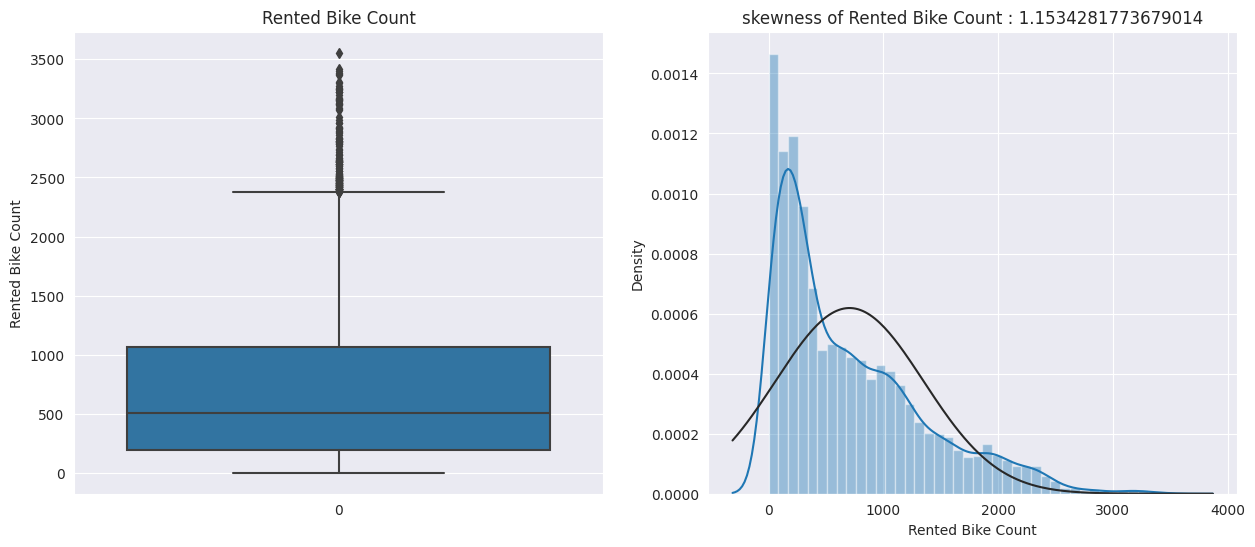

____________________________________________________________________________________________________


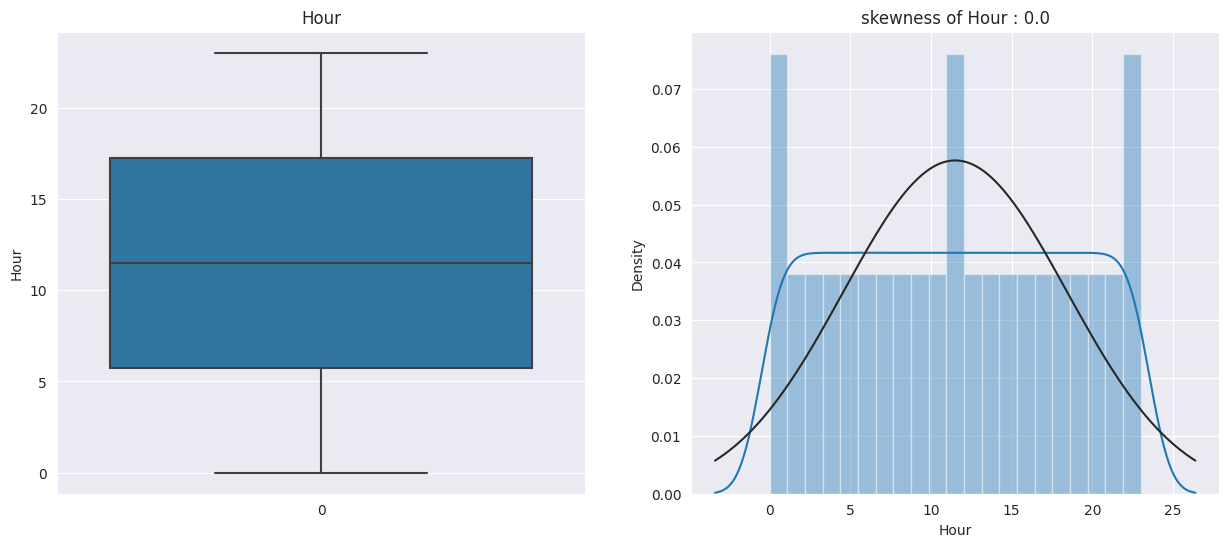

____________________________________________________________________________________________________


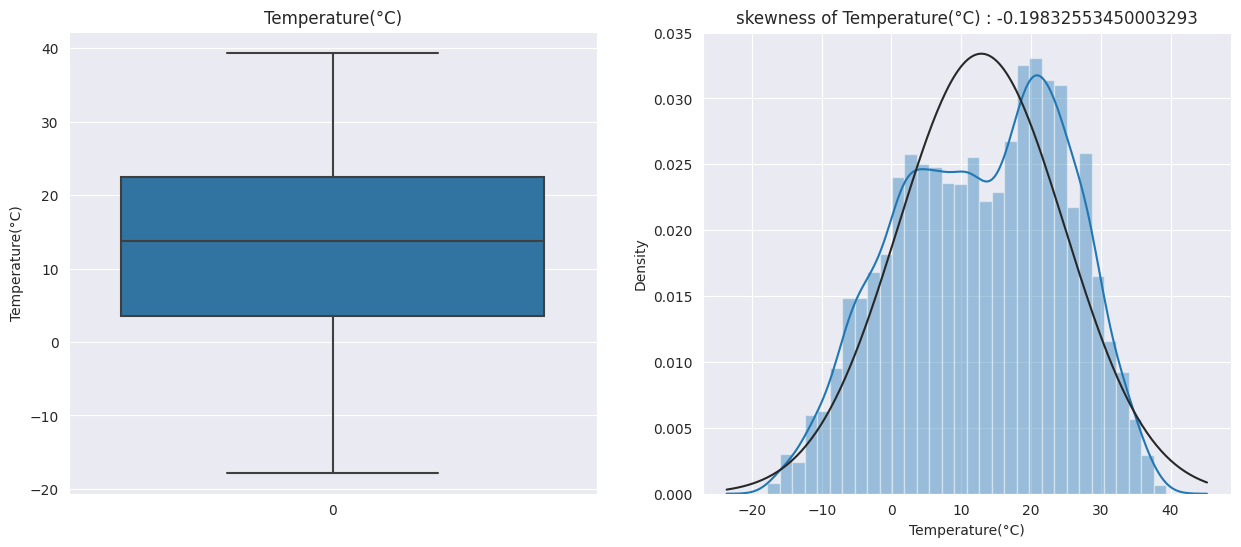

____________________________________________________________________________________________________


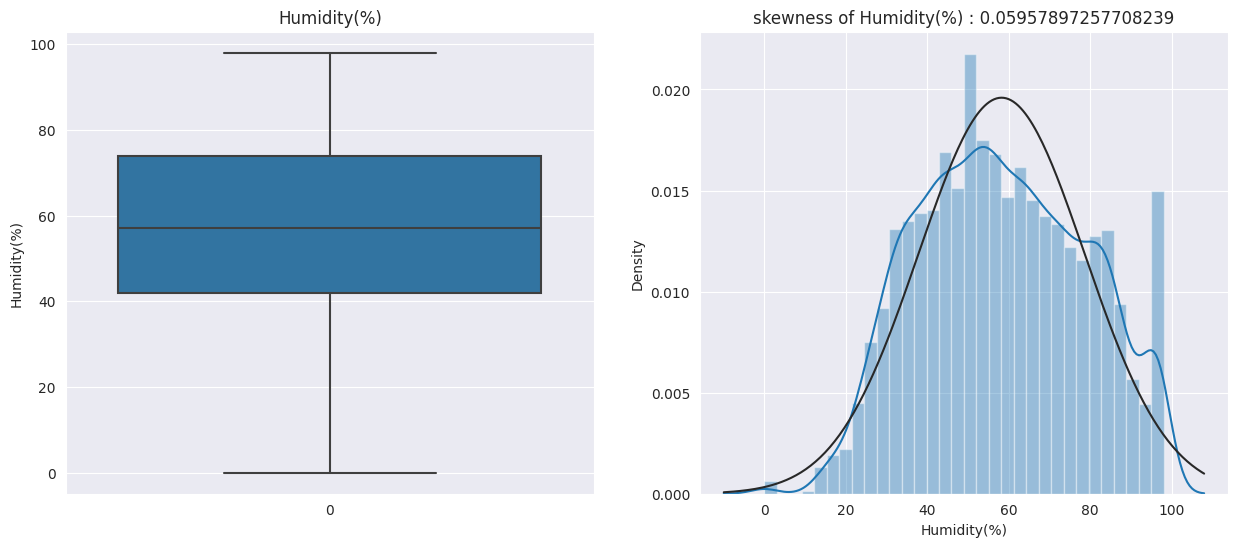

____________________________________________________________________________________________________


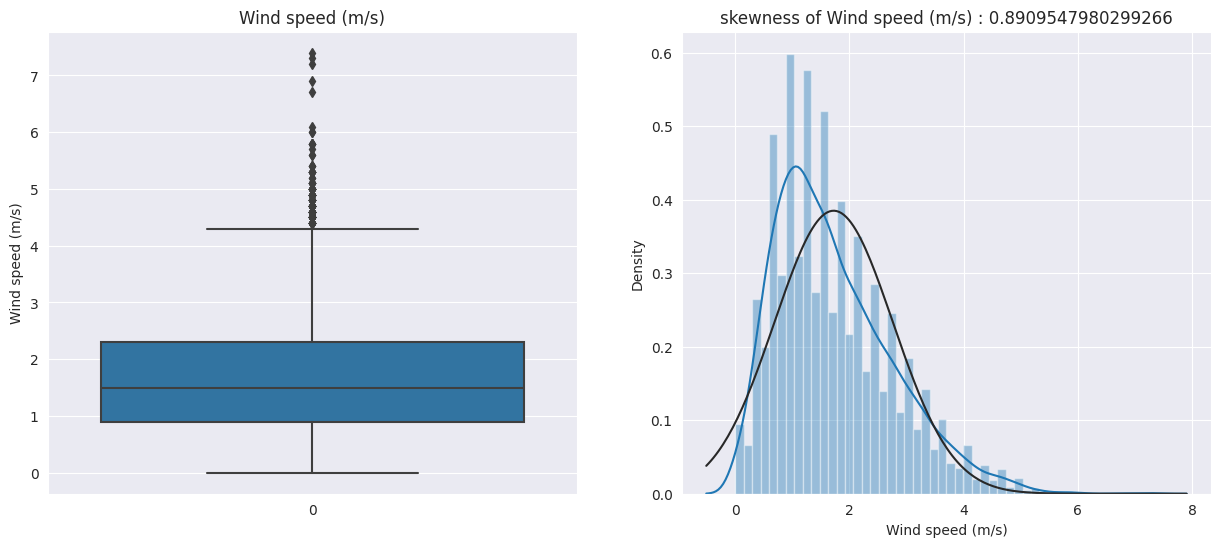

____________________________________________________________________________________________________


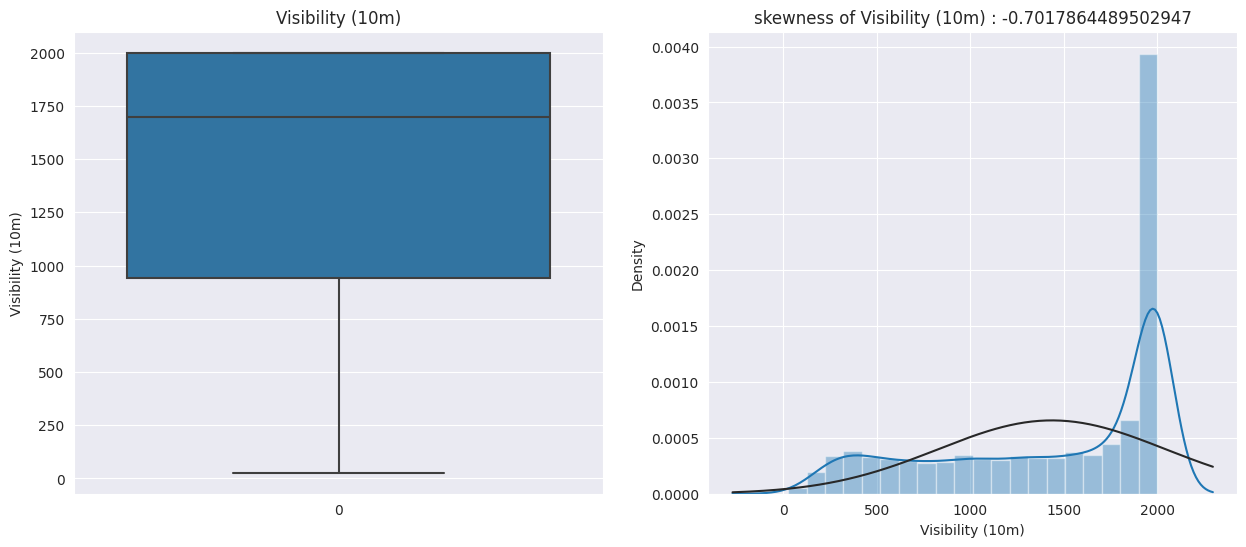

____________________________________________________________________________________________________


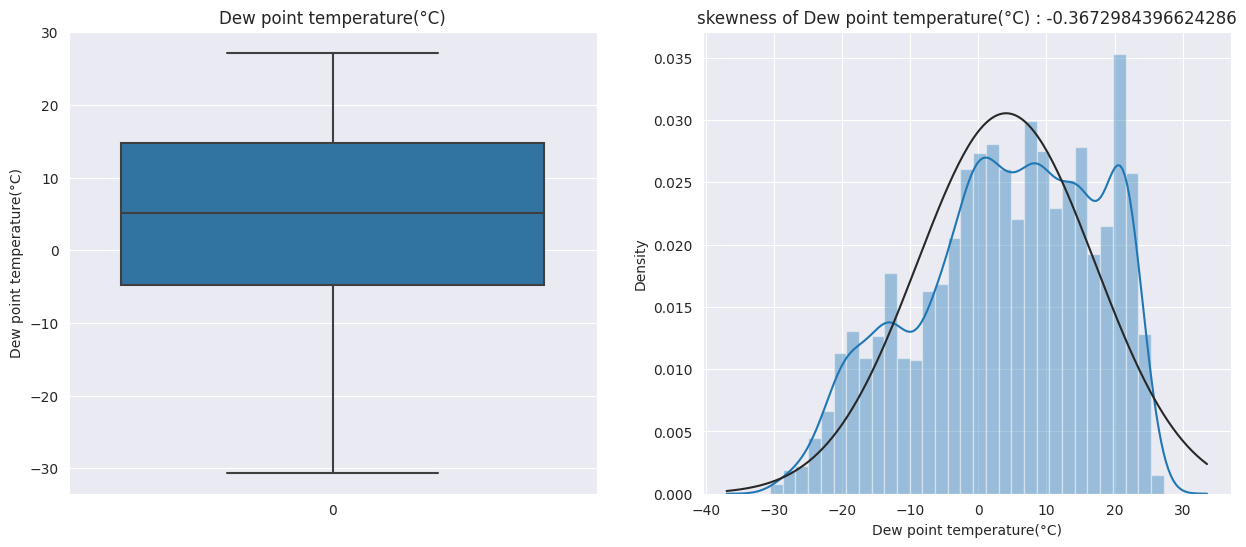

____________________________________________________________________________________________________


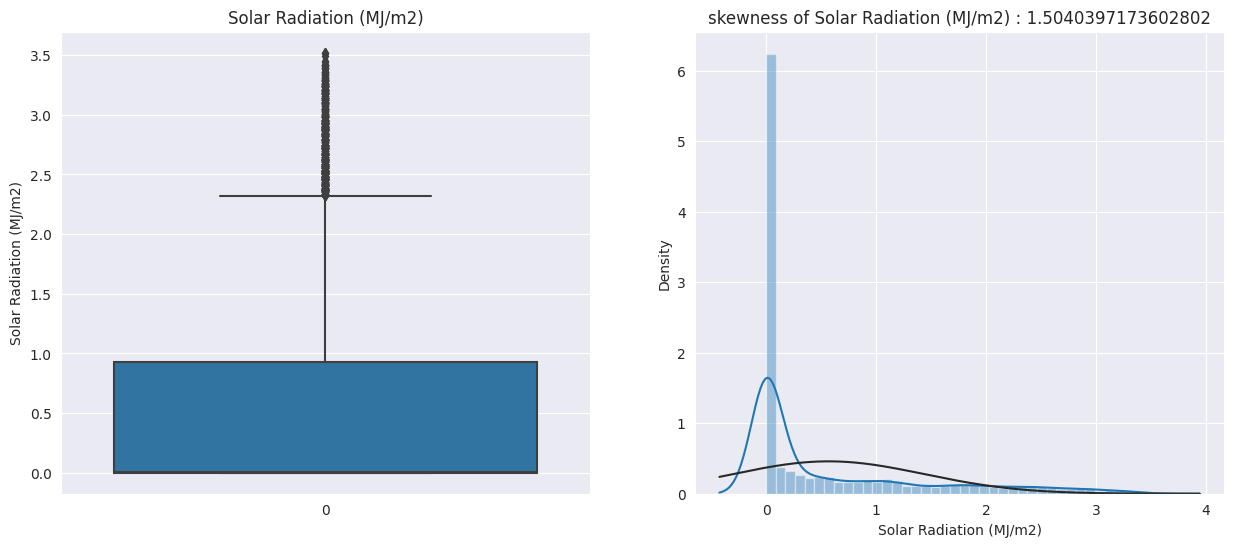

____________________________________________________________________________________________________


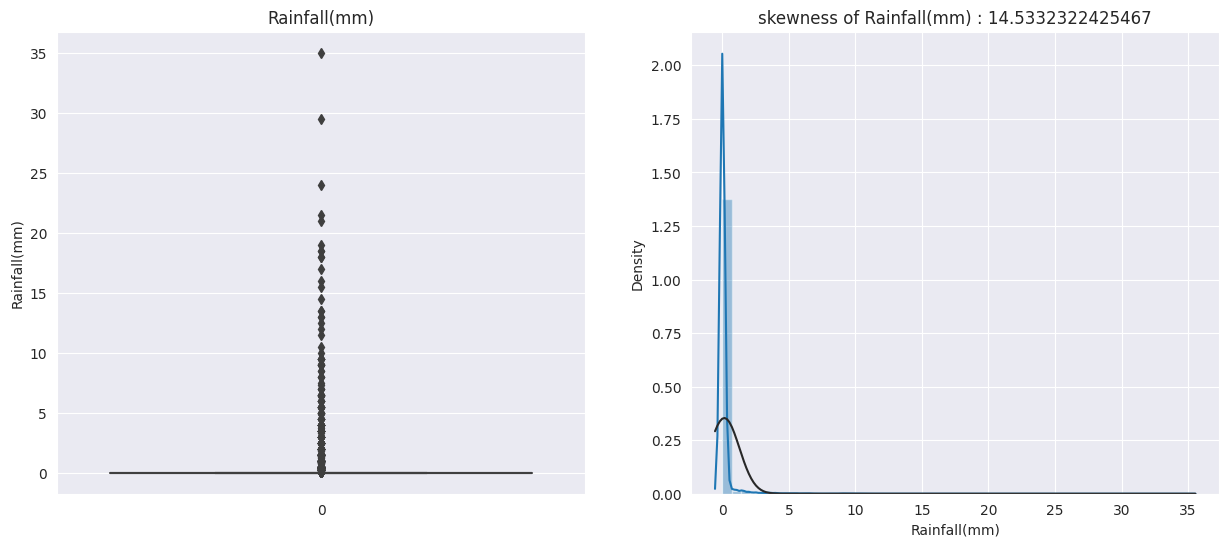

____________________________________________________________________________________________________


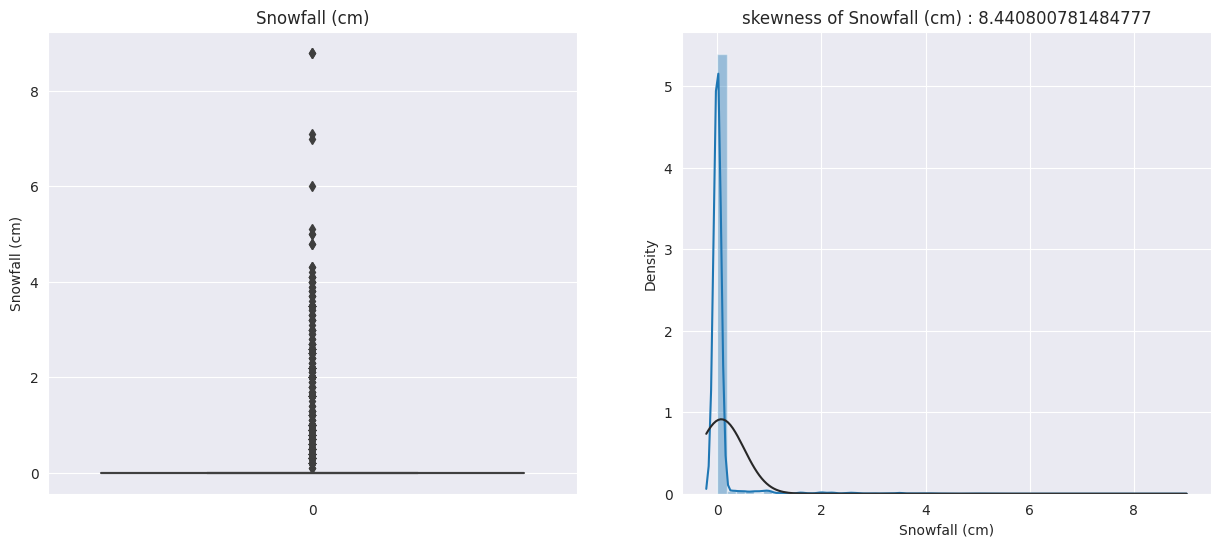

In [19]:
# Checking for outliers in numerical variables using boxplot
from scipy.stats import norm

# Removing "Date" variable from numerical variable
num_var=[var for var in numerical_variables_df.columns if var not in ["Date"]]

# Plotting Box and Distribution plot 
for var in num_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=df[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    plt.subplot(1,2,2)
    ax=sns.distplot(df[var], fit=norm)
    ax.set_title(f'skewness of {var} : {df[var].skew()}')
    ax.set_xlabel(var)
    print('__'*50)
    plt.show()

In [20]:
# Using Inter Quartile Range for removing outliers from numerical variables

# Defining outlier features
outlier_var=['Rented Bike Count', 'Wind speed (m/s)', 'Solar Radiation (MJ/m2)']

# Capping dataset
for i in outlier_var:
    # Findling IQR
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    
    # Defining upper and lower limit
    lower_limit =df[i].quantile(0.25)-1.5*IQR
    upper_limit =df[i].quantile(0.75)+1.5*IQR
    
    # Applying lower and upper limit to each variables
    df.loc[(df[i] > upper_limit),i] = upper_limit
    df.loc[(df[i] < lower_limit),i] = lower_limit

____________________________________________________________________________________________________


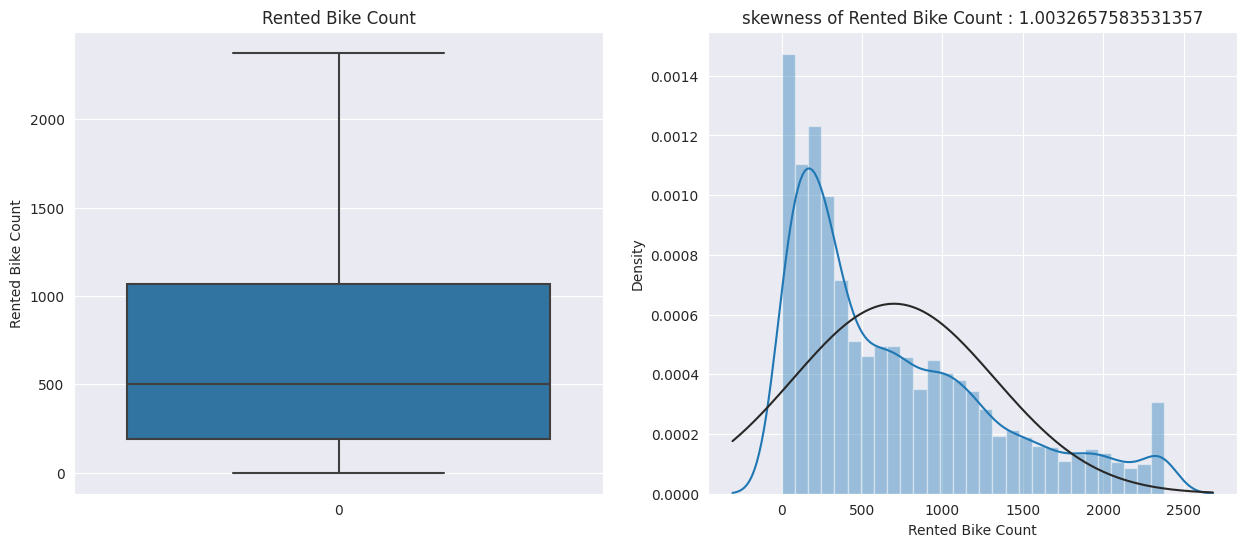

____________________________________________________________________________________________________


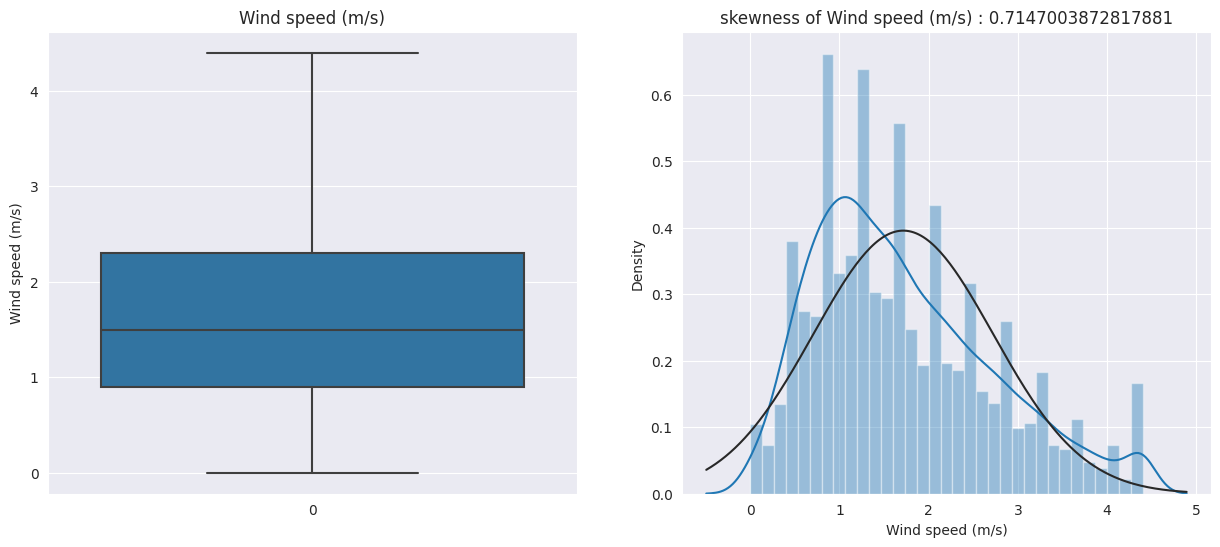

____________________________________________________________________________________________________


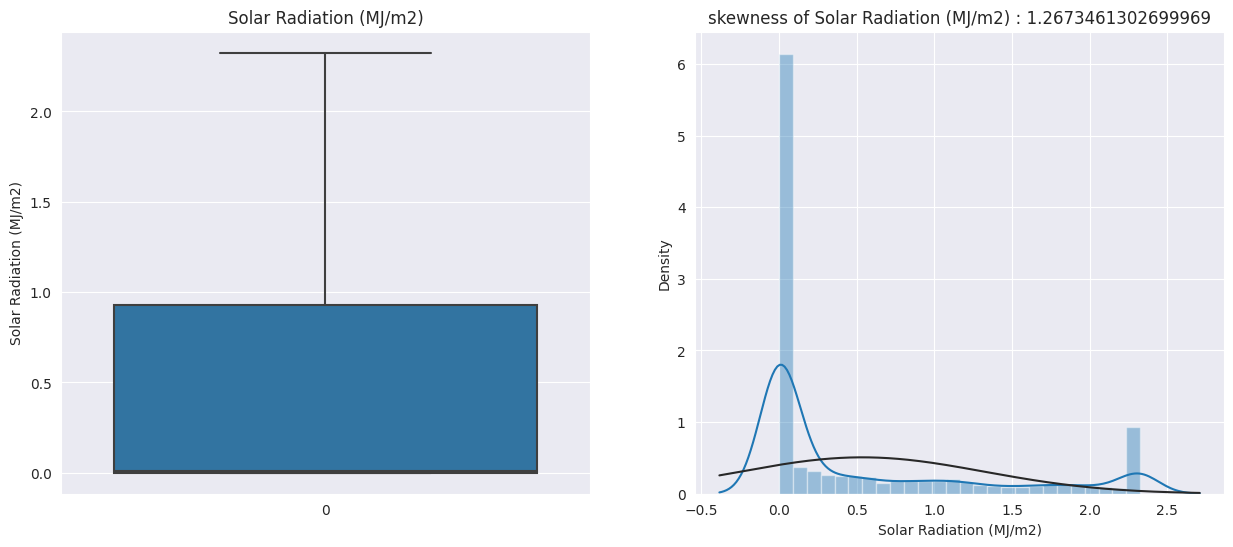

In [21]:
# Checking outliers for after removing it

for var in outlier_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=df[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    plt.subplot(1,2,2)
    ax=sns.distplot(df[var], fit=norm)
    ax.set_title(f'skewness of {var} : {df[var].skew()}')
    ax.set_xlabel(var)
    print('__'*50)
    plt.show()

In [22]:
# Final Basic description of dataset
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          698.789812    11.500000        12.882922    58.226256   
std           626.910124     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          2376.625000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.715993       1436.825799                   4.073813   
std            1.008186        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            4.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.536235      0.148687       0.075068  
std                   0.785364      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   2.325000     35.000000       8.800000

In [23]:
# Checking unique values from each variable
for i in df.columns:
    print(f'{i} : {df[i].unique()}')
    print('--'*50)

Date : ['2017-01-12T00:00:00.000000000' '2017-02-12T00:00:00.000000000'
 '2017-03-12T00:00:00.000000000' '2017-04-12T00:00:00.000000000'
 '2017-05-12T00:00:00.000000000' '2017-06-12T00:00:00.000000000'
 '2017-07-12T00:00:00.000000000' '2017-08-12T00:00:00.000000000'
 '2017-09-12T00:00:00.000000000' '2017-10-12T00:00:00.000000000'
 '2017-11-12T00:00:00.000000000' '2017-12-12T00:00:00.000000000'
 '2017-12-13T00:00:00.000000000' '2017-12-14T00:00:00.000000000'
 '2017-12-15T00:00:00.000000000' '2017-12-16T00:00:00.000000000'
 '2017-12-17T00:00:00.000000000' '2017-12-18T00:00:00.000000000'
 '2017-12-19T00:00:00.000000000' '2017-12-20T00:00:00.000000000'
 '2017-12-21T00:00:00.000000000' '2017-12-22T00:00:00.000000000'
 '2017-12-23T00:00:00.000000000' '2017-12-24T00:00:00.000000000'
 '2017-12-25T00:00:00.000000000' '2017-12-26T00:00:00.000000000'
 '2017-12-27T00:00:00.000000000' '2017-12-28T00:00:00.000000000'
 '2017-12-29T00:00:00.000000000' '2017-12-30T00:00:00.000000000'
 '2017-12-31T00:00

In [24]:
# Performing feature engineering on feature Date
df['day']=df['Date'].dt.day
df['month']=df['Date'].dt.month
df['year']=df['Date'].dt.year

In [25]:
# Dropping original  Date feature after performing feature engineering
df.drop(columns='Date', axis=1, inplace=True)

In [26]:
# Bsic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   float64
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  day                        8760 non-null   int64

In [27]:
# Obtaing target variable
excluded_variables=[var for var in df.columns if len(df[var].value_counts()) > 15]
target_variables=[var for var in df.columns if var not in excluded_variables]

# Defining r to autofit the number and size of plots
r = int(len(target_variables)/3 +1)

In [28]:
# Defining a function to Notate the percent count of each value on the bars
def annot_percent(axes):
    '''Takes axes as input and labels the percent count of each bar in a countplot'''
    for p in plot.patches:
        total = sum(p.get_height() for p in plot.patches)/100
        percent = round((p.get_height()/total),2)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        plot.annotate(f'{percent}%', (x, y), ha='center', va='bottom')

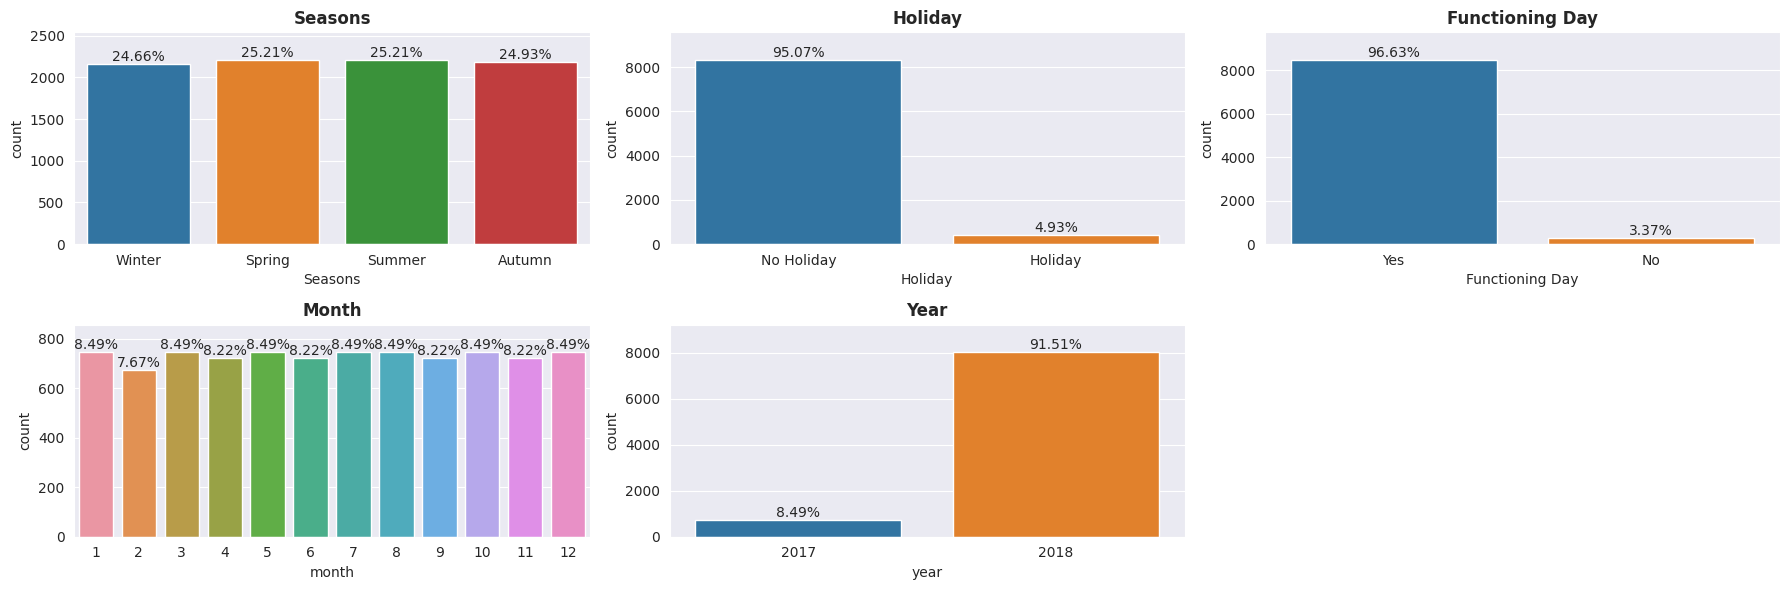

In [29]:
# Plotting the countplots for each variable in target_variables
plt.figure(figsize=(18,r*3))
for n,var in enumerate(target_variables):
    plot = plt.subplot(r,3,n+1)
    sns.countplot(x=df[var]).margins(y=0.15)
    plt.title(f'{var.title()}',weight='bold')
    plt.tight_layout()
    annot_percent(plot)

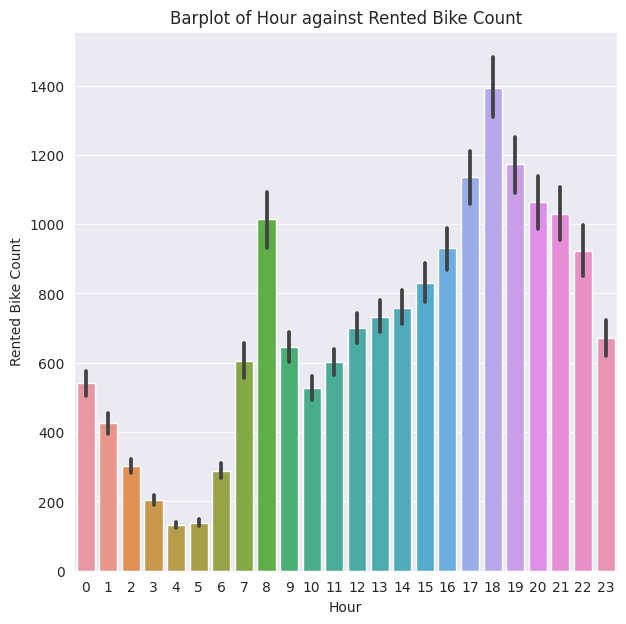

In [30]:
# Plotting graph of 'Hour' against 'Rented Bike Count'
plt.figure(figsize=(7,7))
ax=sns.barplot(x="Hour", y="Rented Bike Count",data=df)
ax.set_title('Barplot of Hour against Rented Bike Count')
plt.show()

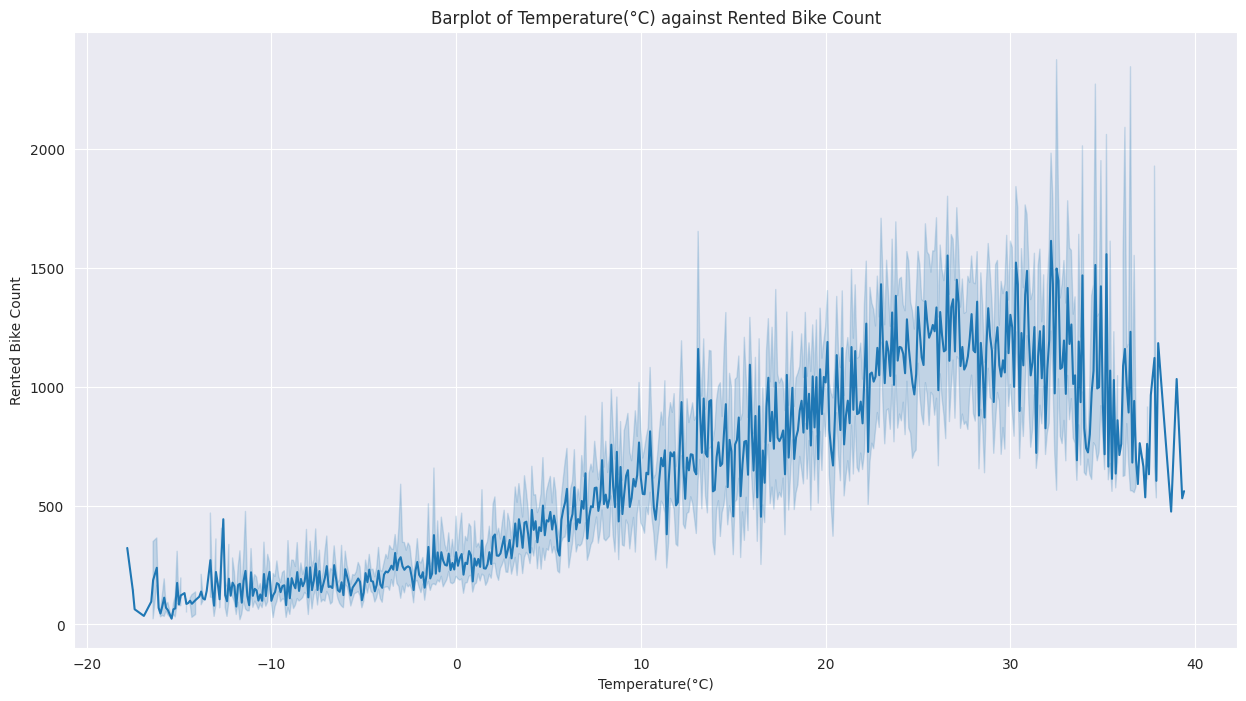

In [31]:
# Checking effect of temperature(°C) on rented bike use
plt.figure(figsize=(15,8))
ax=sns.lineplot(x="Temperature(°C)", y="Rented Bike Count",data=df)
ax.set_title('Barplot of Temperature(°C) against Rented Bike Count')
plt.show()

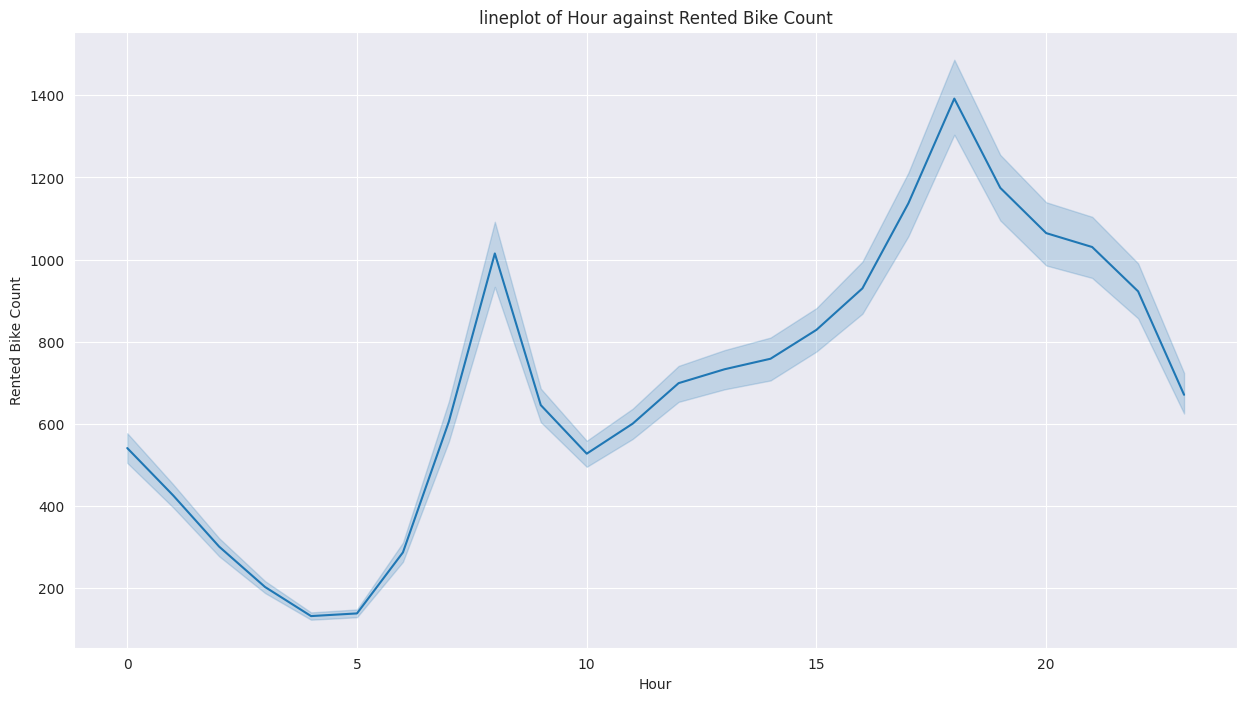

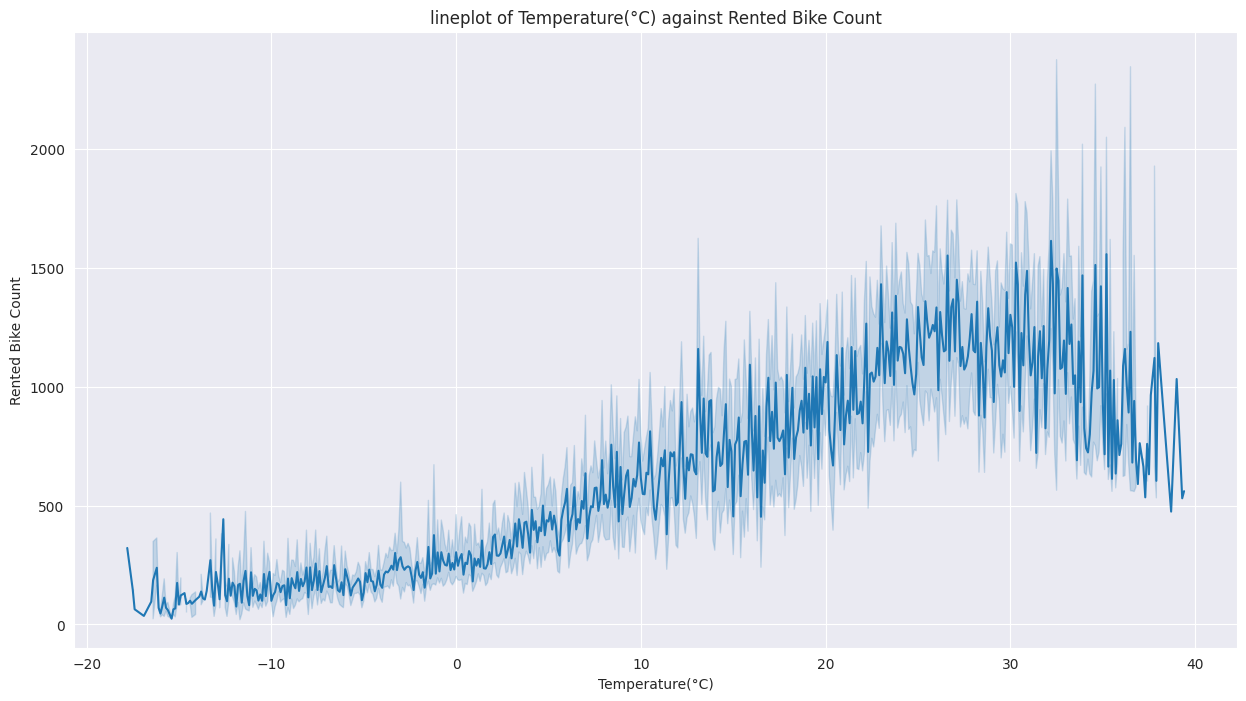

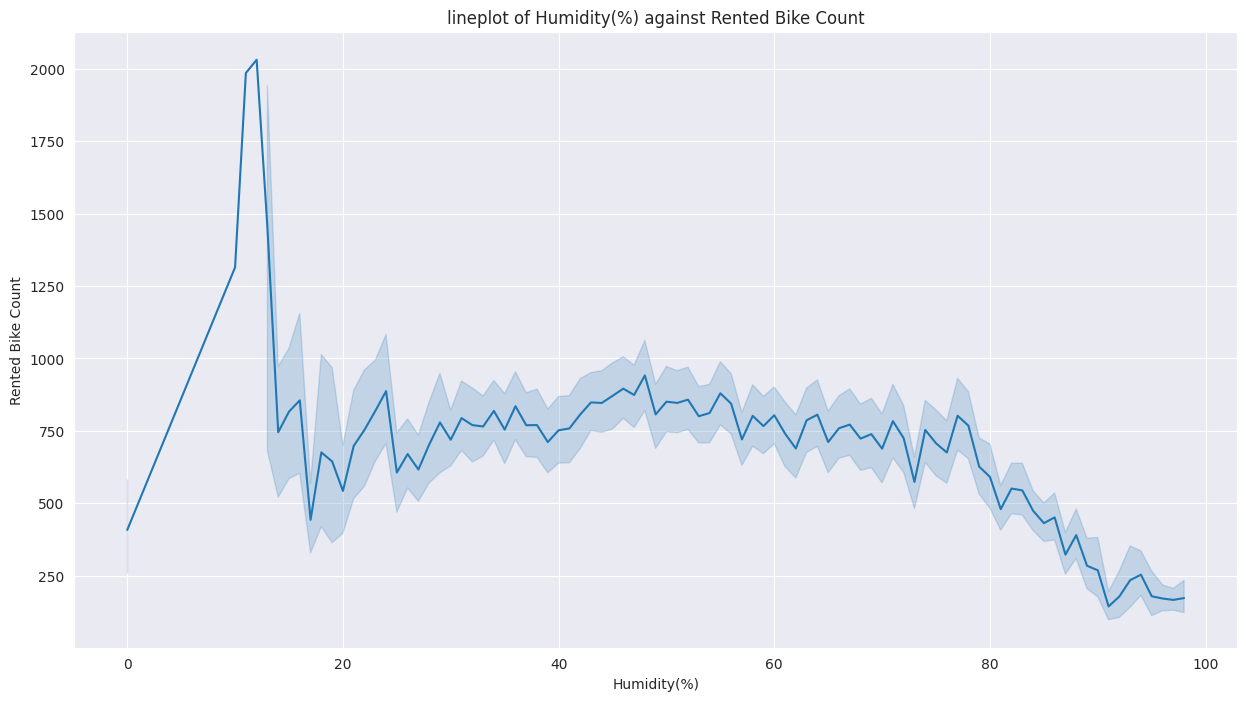

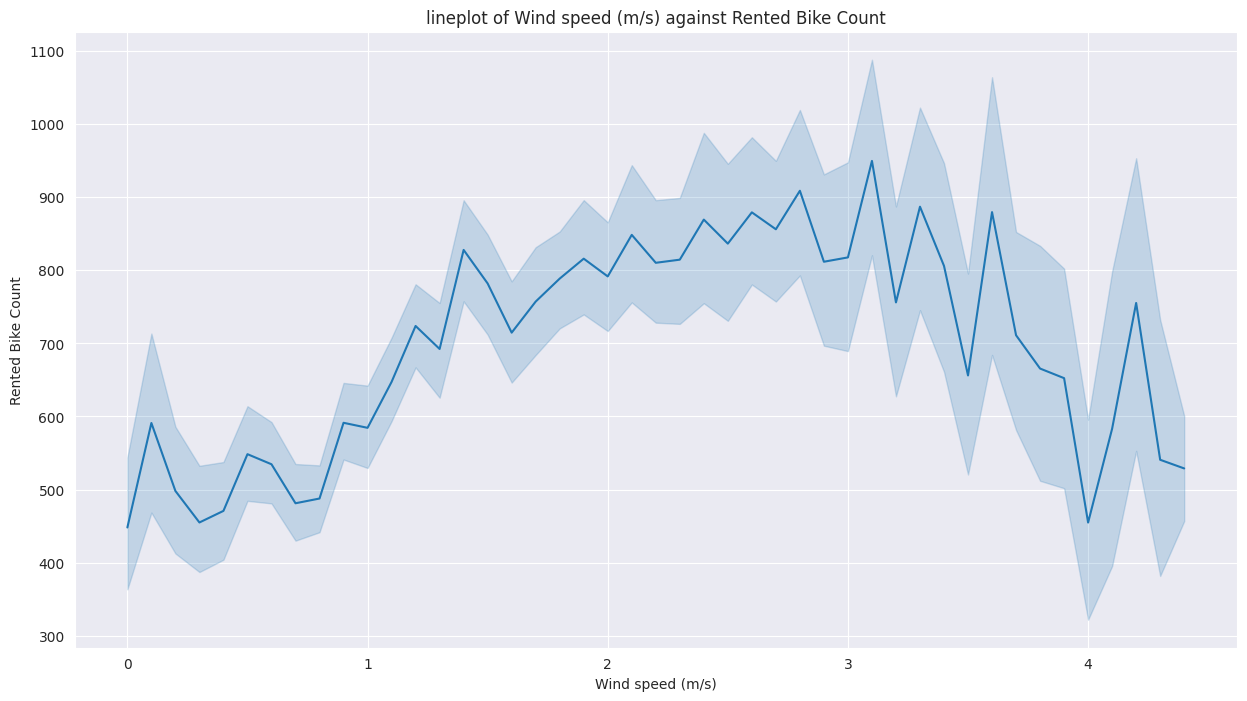

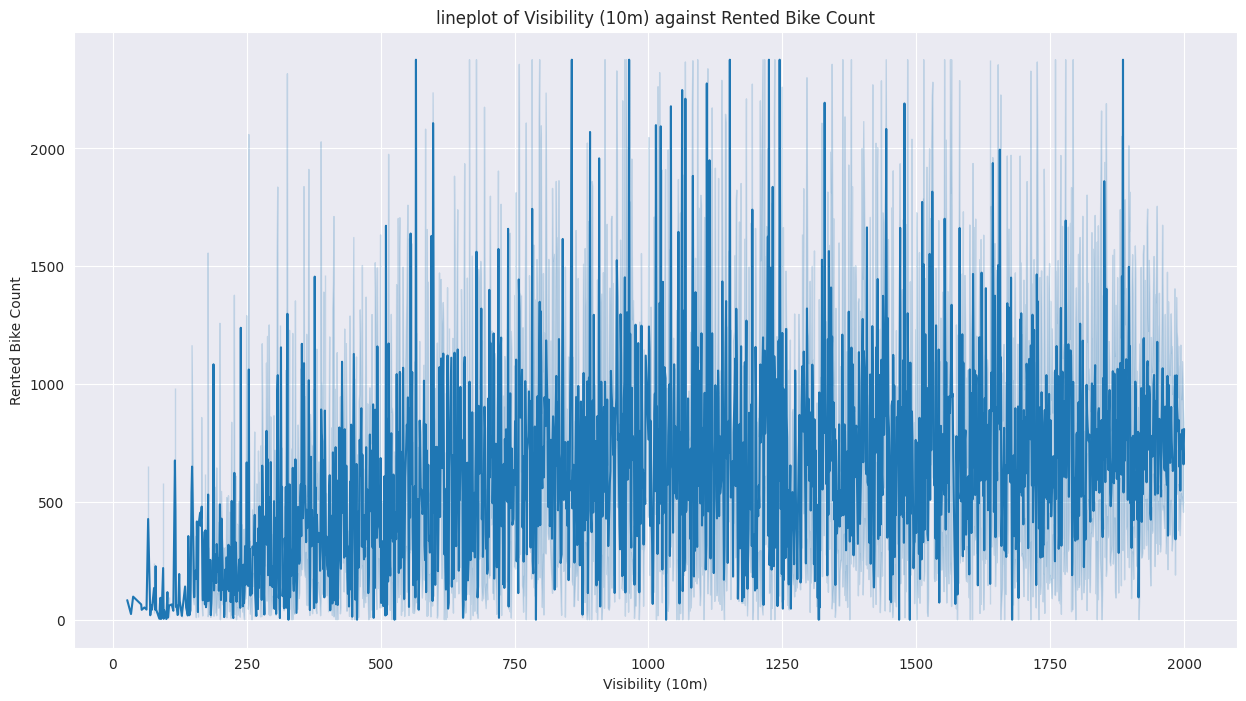

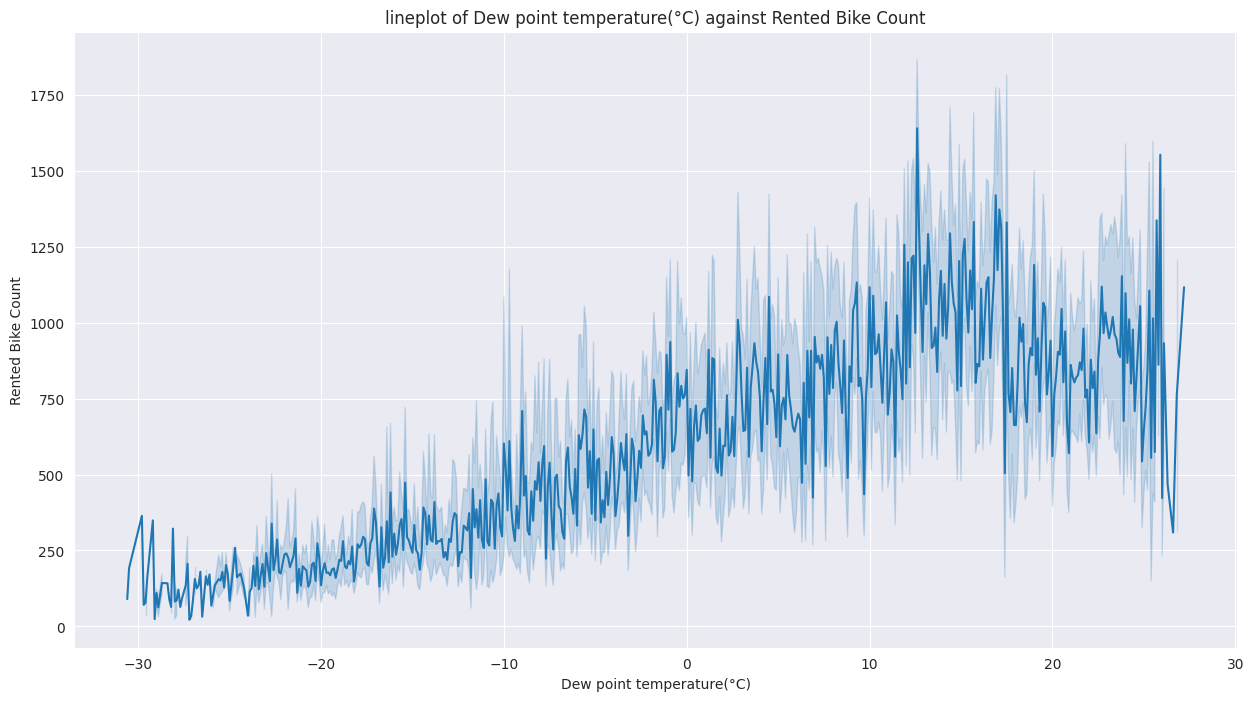

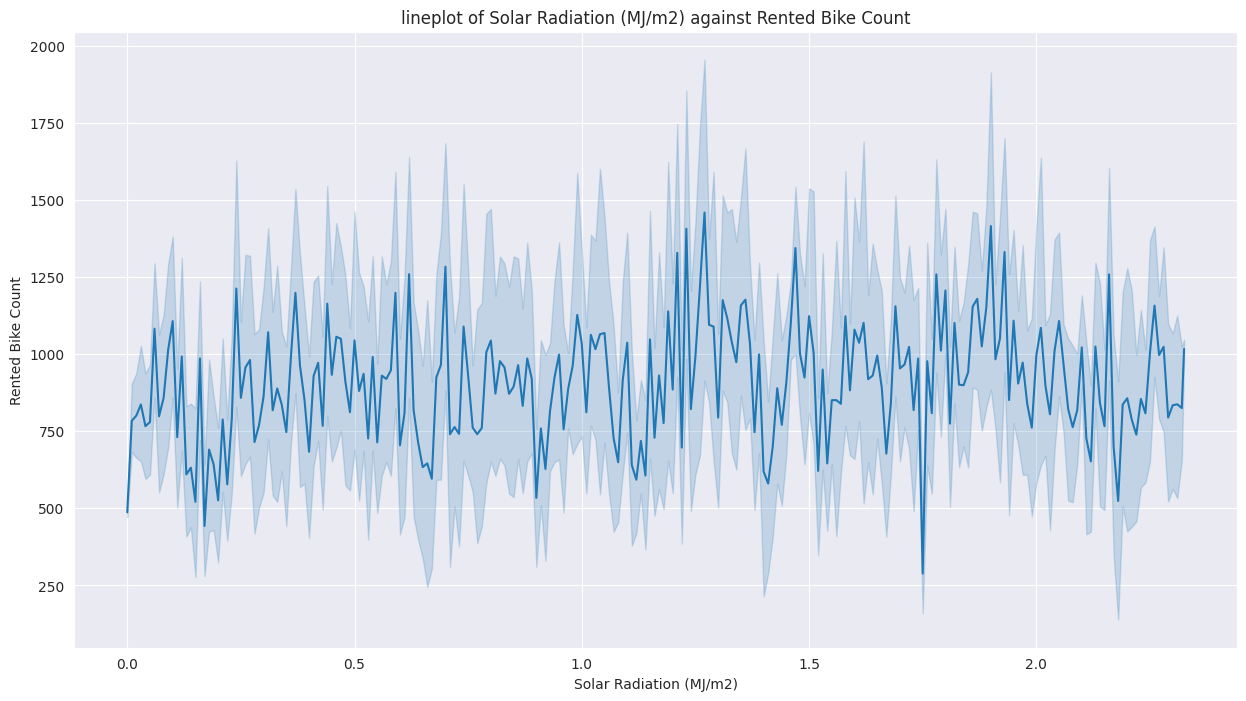

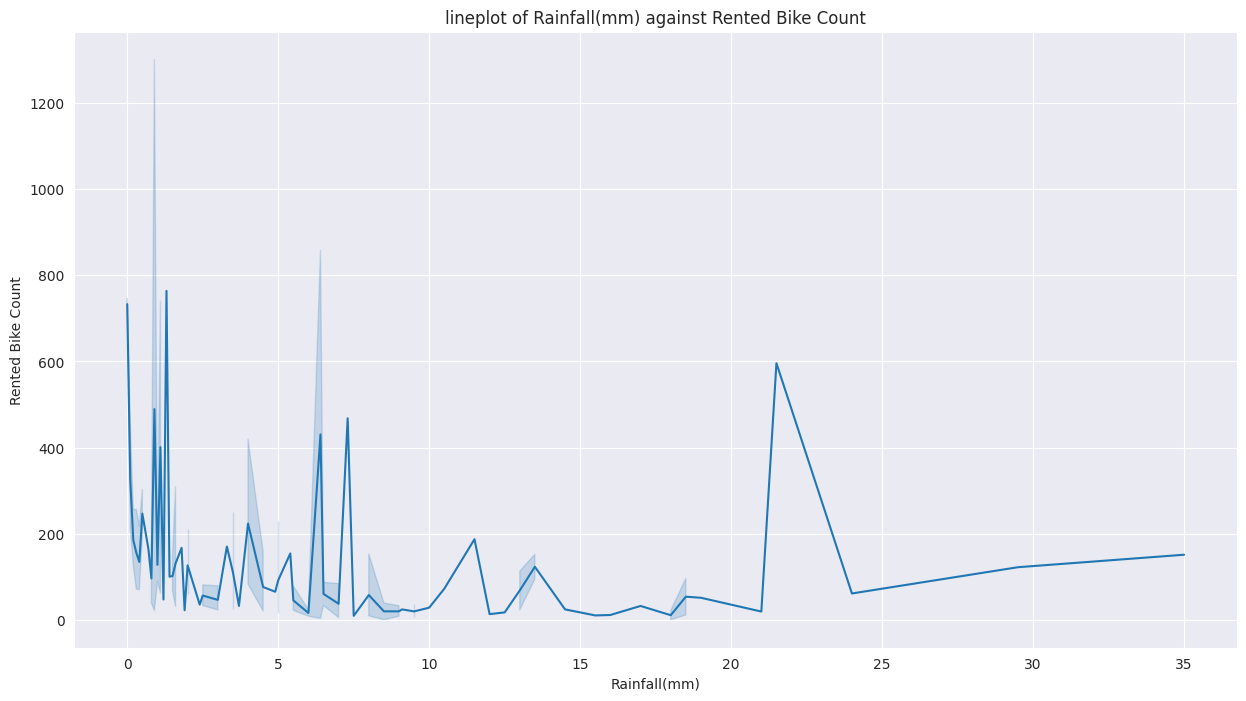

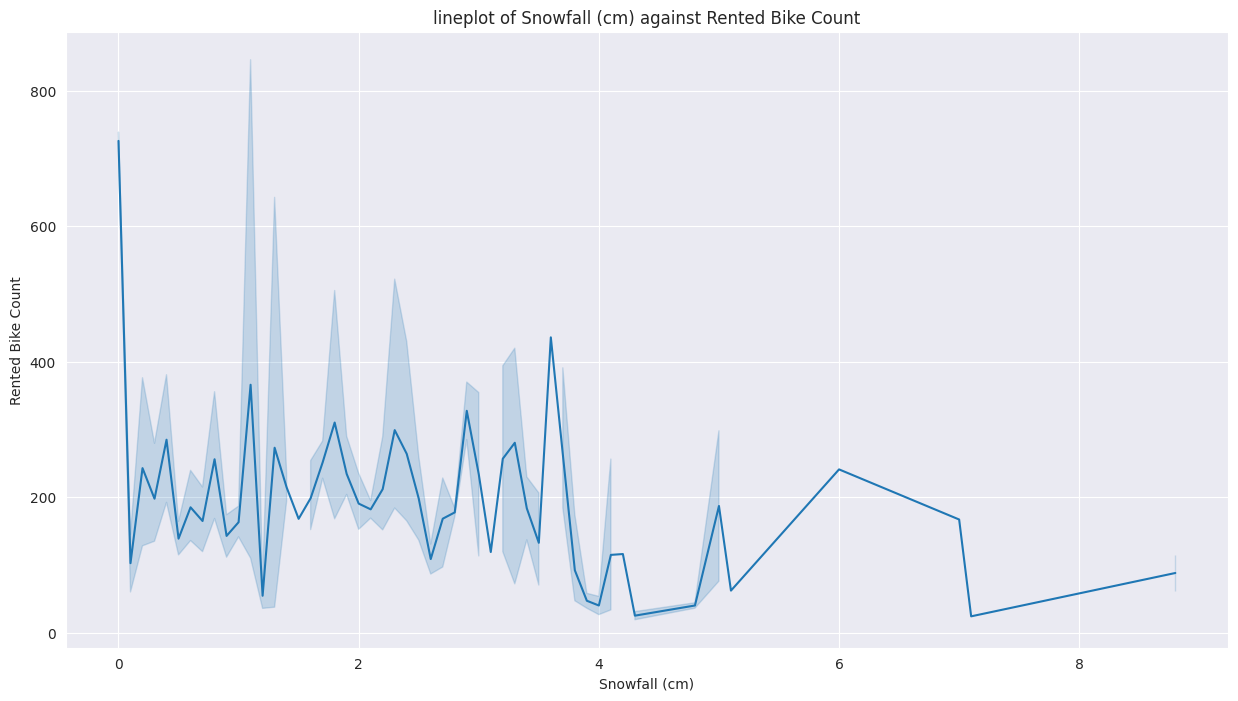

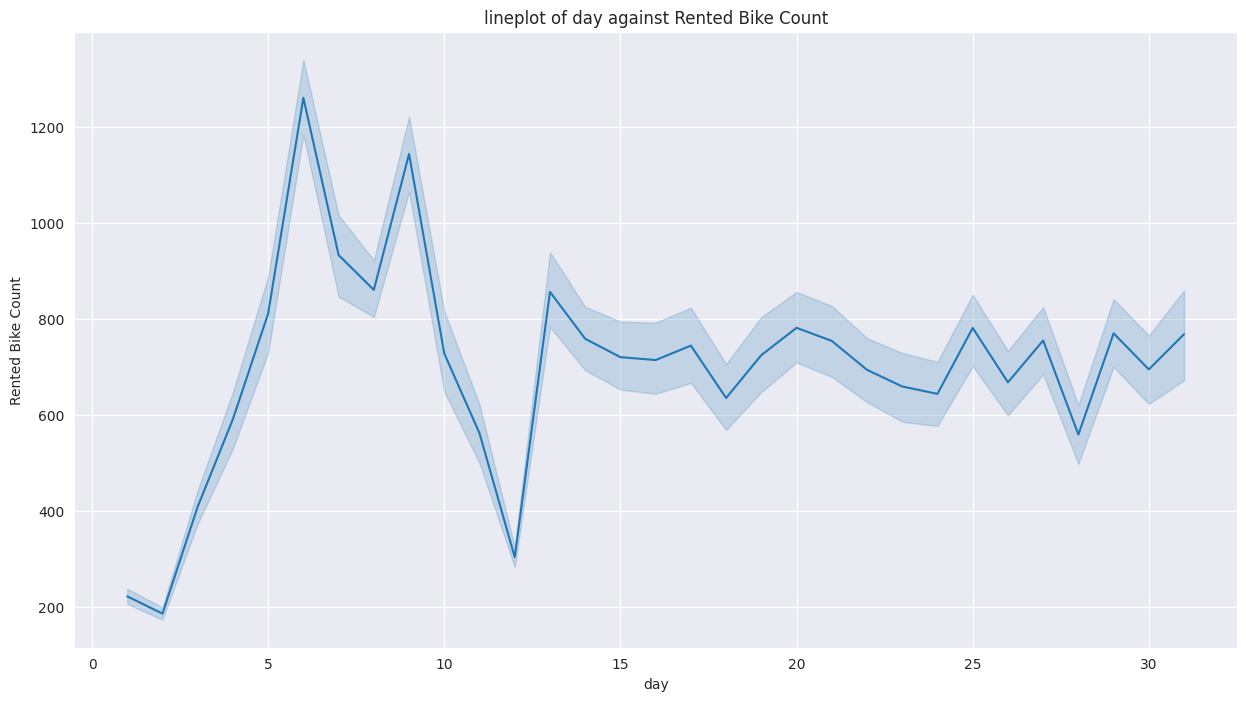

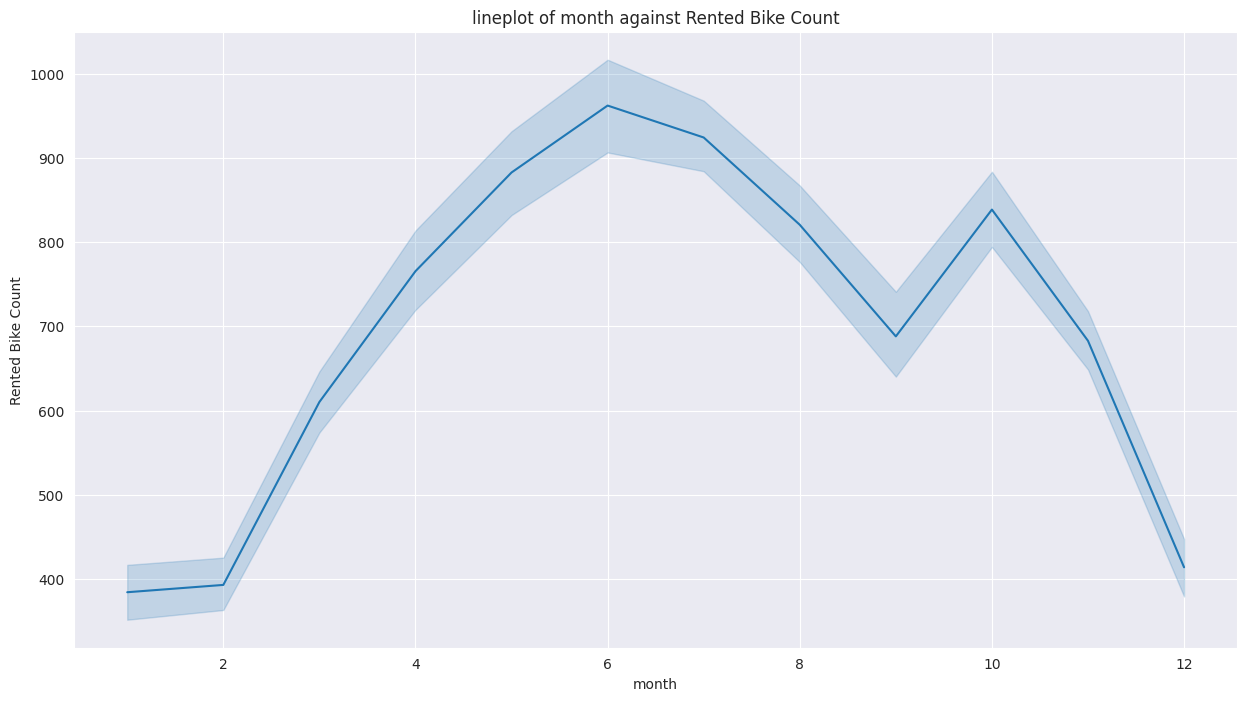

In [32]:
# Checking effect of each variable on use of rented bike
target_variables=[var for var in df.columns if var not in ['Rented Bike Count', 'Seasons', 'Holiday', 'Functioning Day', 'year']]
for var in target_variables:
    plt.figure(figsize=(15,8))
    ax=sns.lineplot(x=df[var], y=df["Rented Bike Count"],data=df)
    ax.set_title(f'lineplot of {var} against Rented Bike Count')
    plt.show()

Obsevations :

Customers who travel most commonly use rented bikes in the morning at 8 a.m. and in the evening at 6 p.m.

When the humidity level is between 10% and 18%, people prefer to rent bikes.

When wind speed is between 2 m/s and 3.5 m/s, people consistently use rented bikes, and it is at its peak when wind speed is normal, which is 3.2 m/s.

Renting a bike is the best option for customers in dew point temperatures ranging from 12°C to 18°C. The use of a rented bike increases with increasing dew point temperatures, but it still reaches normal dew point temperatures.

According to the graph, solar radiation has no effect on customer use of rented bikes.

When it's not raining, people prefer rental bikes the most.

When there is no snowfall, most people opt to rent bikes. However, the majority of customers prefer to rent bikes when it snows up to 4 cm.

In the first 10 days of the month, most rented bikes are used by customers. Customers consistently use rented bikes in the last 15 days of the month.

In June, most rented bikes are used through the year, followed by October. Customers' use of rent bikes is at its peak from April to September.

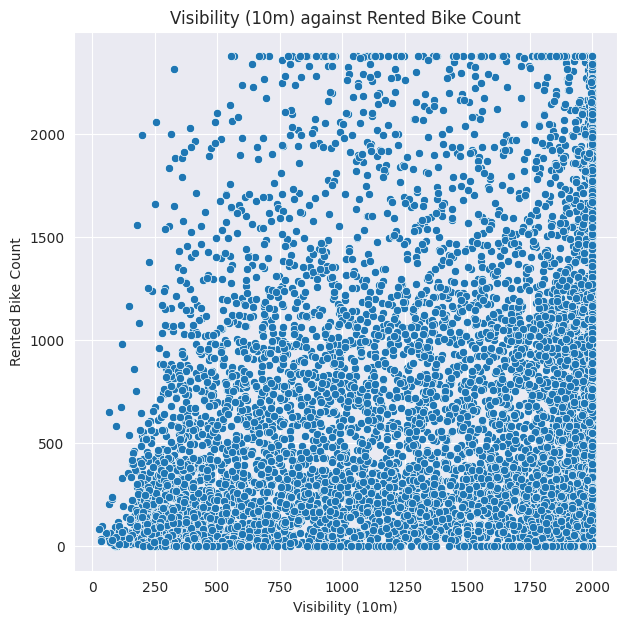

In [33]:
# Plotting graph of 'Visibility (10m)' against 'Rented Bike Count'
plt.figure(figsize=(7,7))
ax=sns.scatterplot(x="Visibility (10m)", y="Rented Bike Count",data=df)
ax.set_title('Visibility (10m) against Rented Bike Count')
plt.show()

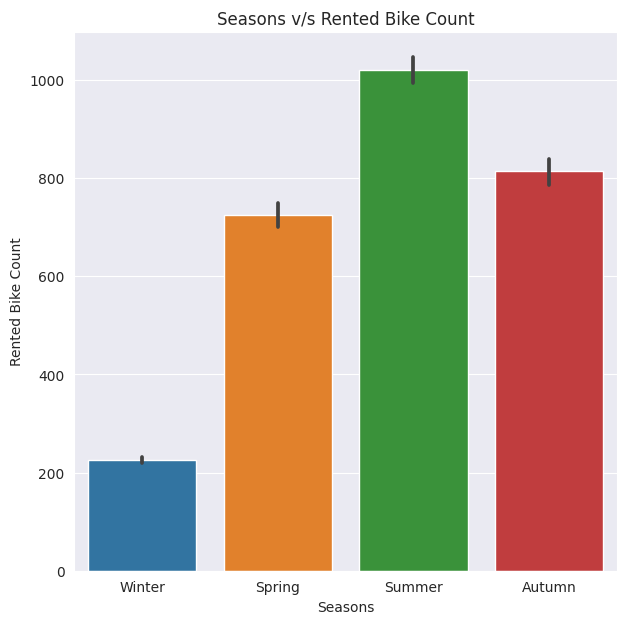

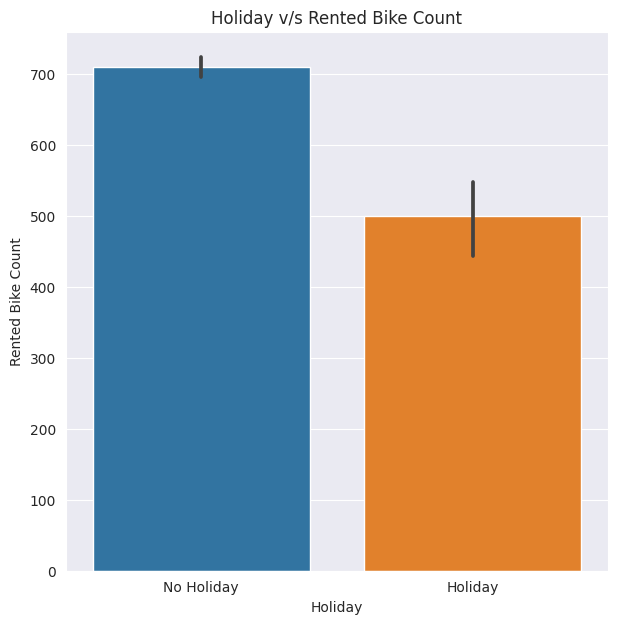

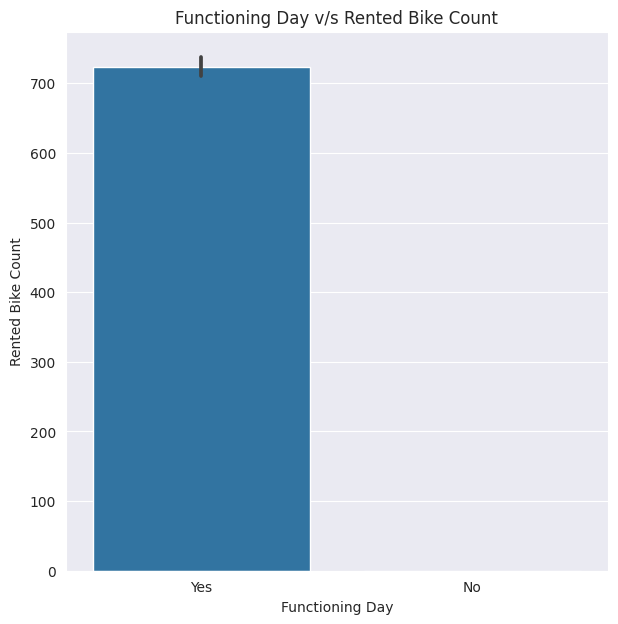

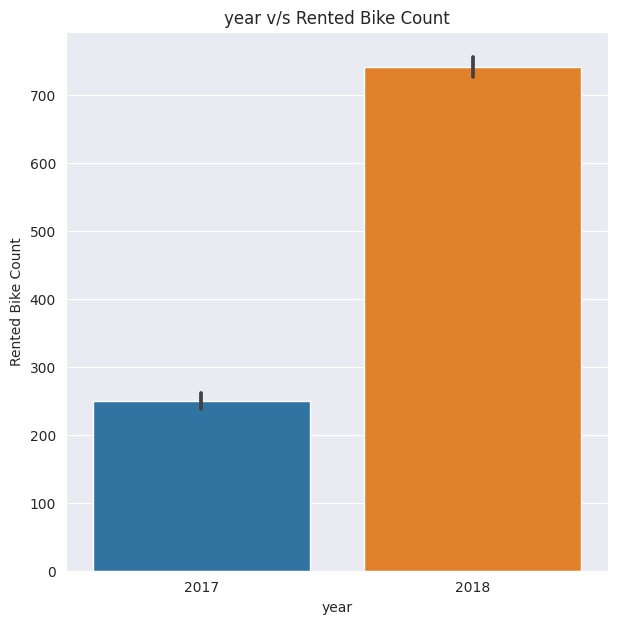

In [34]:
# Plotting bar plot for variables

# Defining target variables
target=[var for var in df.columns if var in ['Seasons', 'Holiday', 'Functioning Day', 'year']]

for var in target:
    plt.figure(figsize=(7,7))
    ax=sns.barplot(x=df[var], y='Rented Bike Count', data=df)
    ax.set_title(f'{var} v/s Rented Bike Count')
    plt.show()

## Data Pre-processing

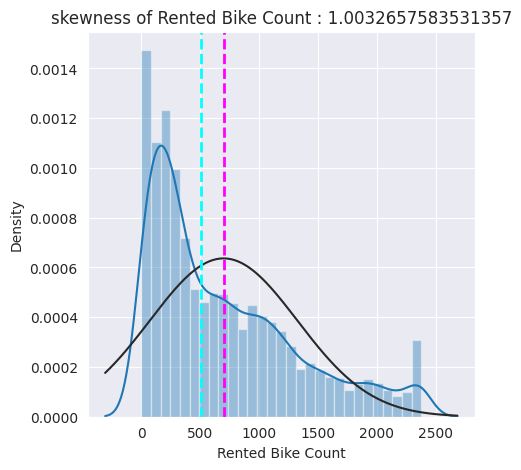

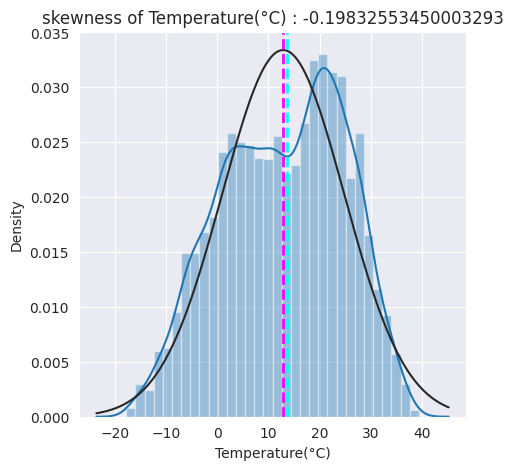

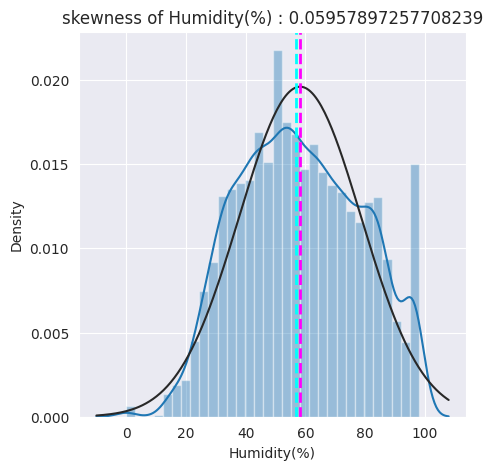

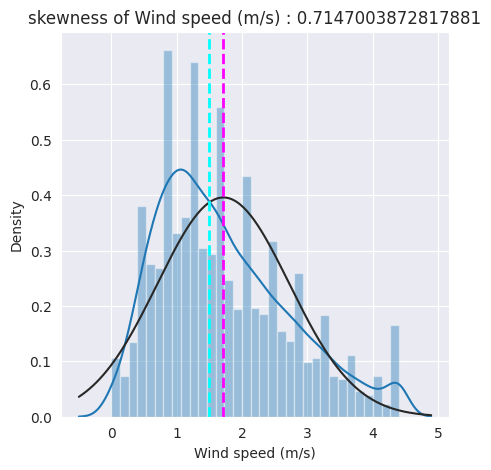

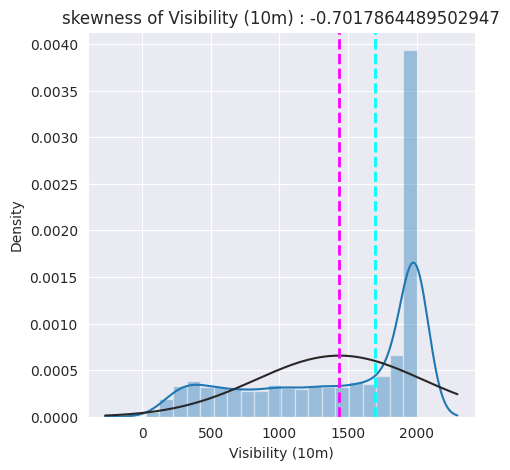

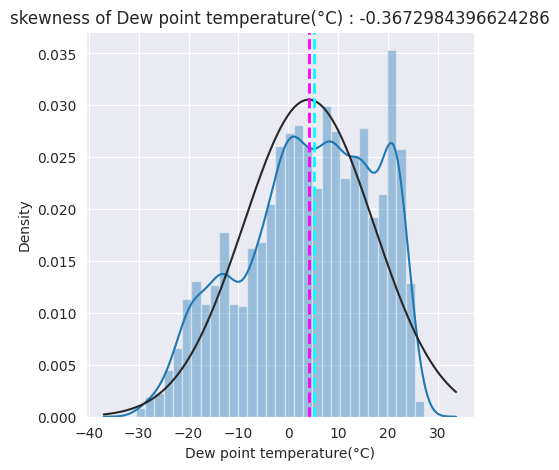

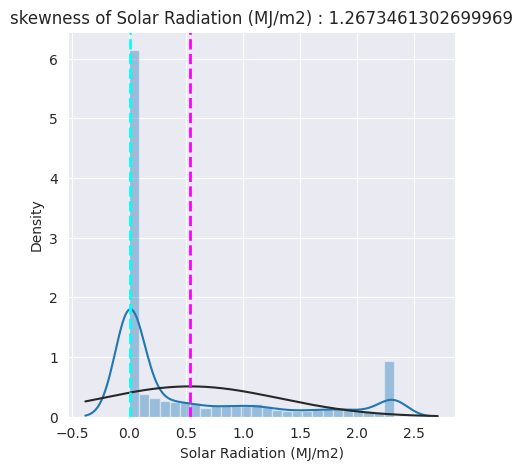

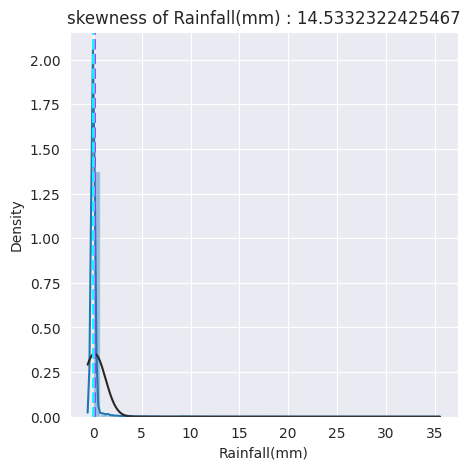

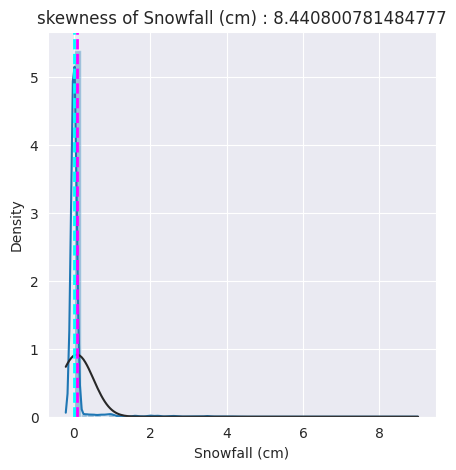

In [35]:
# Ckecking distribution of numerical feature
# Defining numerical contineous variables
num_variables=['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

# Plotting distribution plot for each numerical variables
from scipy.stats import norm
for var in num_variables:
    plt.figure(figsize=(5,5))
    ax=sns.distplot(df[var], fit=norm)
    ax.axvline(df[var].mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(df[var].median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(f'skewness of {var} : {df[var].skew()}')
    plt.show()

In [36]:
# import module
from tabulate import tabulate
 
# assign data
mydata = [
    ["Rented Bike Count", "1.0032657583531357", 'Slightly'],
    ["Temperature(°C", "-0.19832553450003293", 'Nearly Symmetrical'],
    ["Humidity(%)", "0.05957897257708239",'Nearly Symmetrical'],
      ["Wind speed (m/s)", "0.7147003872817881",'Slightly'],
    ['Visibility (10m)','-0.7017864489502947','Slightly'],['Dew point temperature(°C)',' -0.3672984396624286', 'Nearly Symmetrical'],['Solar Radiation (MJ/m2)','1.2673461302699969', 'Slightly'],
    ['Rainfall(mm)','14.5332','Large'], ['Snowfall (cm)','8.440800781484777', 'Large']
]
 
# create header
head = ["Feature Name", "Skew", 'Skew-Type']
 
# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))

+---------------------------+-----------+--------------------+
| Feature Name              |      Skew | Skew-Type          |
+===========================+===========+====================+
| Rented Bike Count         |  1.00327  | Slightly           |
+---------------------------+-----------+--------------------+
| Temperature(°C            | -0.198326 | Nearly Symmetrical |
+---------------------------+-----------+--------------------+
| Humidity(%)               |  0.059579 | Nearly Symmetrical |
+---------------------------+-----------+--------------------+
| Wind speed (m/s)          |  0.7147   | Slightly           |
+---------------------------+-----------+--------------------+
| Visibility (10m)          | -0.701786 | Slightly           |
+---------------------------+-----------+--------------------+
| Dew point temperature(°C) | -0.367298 | Nearly Symmetrical |
+---------------------------+-----------+--------------------+
| Solar Radiation (MJ/m2)   |  1.26735  | Slightly     

In [37]:
# Transforming distribution to normal using different transformations

# For positively skewed data
df['Rented Bike Count']=(df['Rented Bike Count']+1).transform(np.sqrt)
df['Wind speed (m/s)']=(df['Wind speed (m/s)']+1).transform(np.log)
df['Solar Radiation (MJ/m2)']=(df['Solar Radiation (MJ/m2)']+1).transform(np.log)

# For negatively skewed data
df['Visibility (10m)']=(max(df['Visibility (10m)']+1)-df['Visibility (10m)']).transform(np.sqrt)

# For large skewed data
df['Rainfall(mm)']=(df['Rainfall(mm)']+1).transform(np.log)
df['Snowfall (cm)']=(df['Snowfall (cm)']+1).transform(np.log)

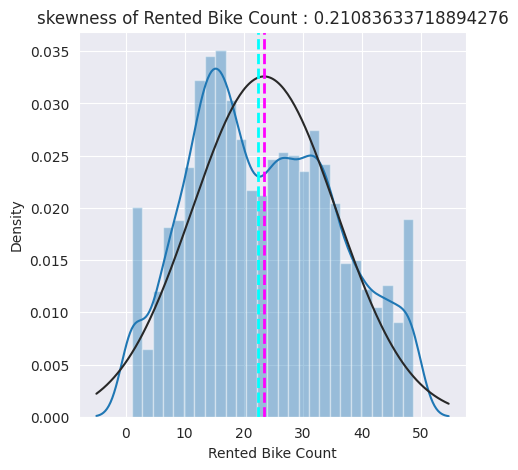

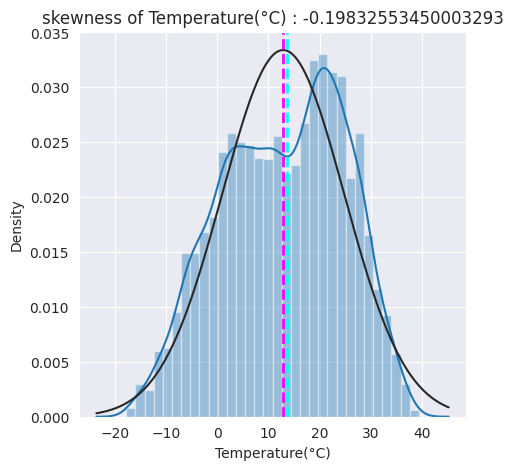

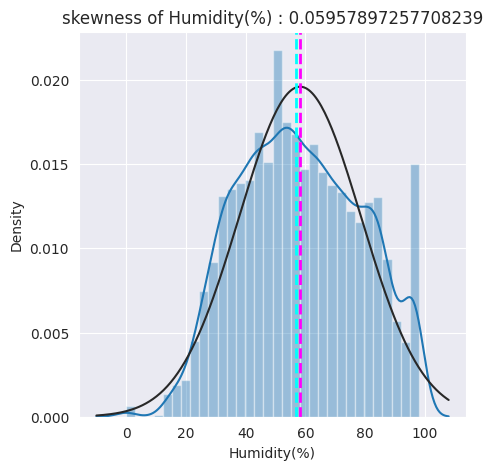

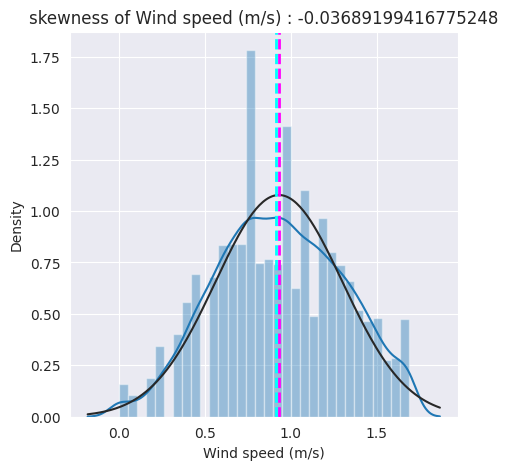

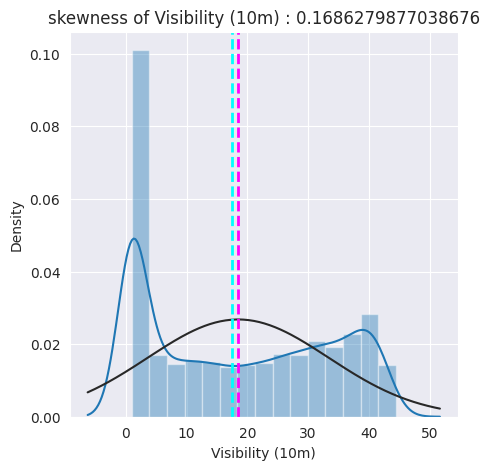

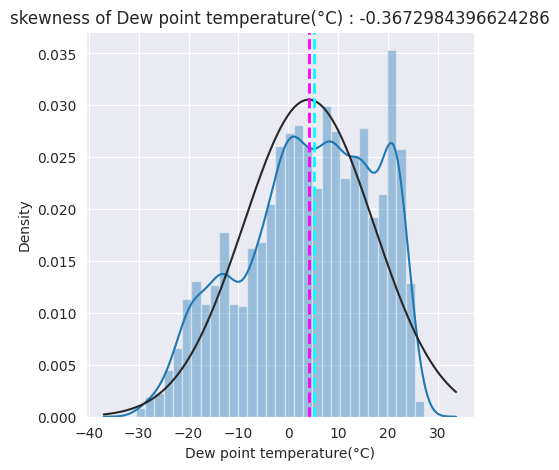

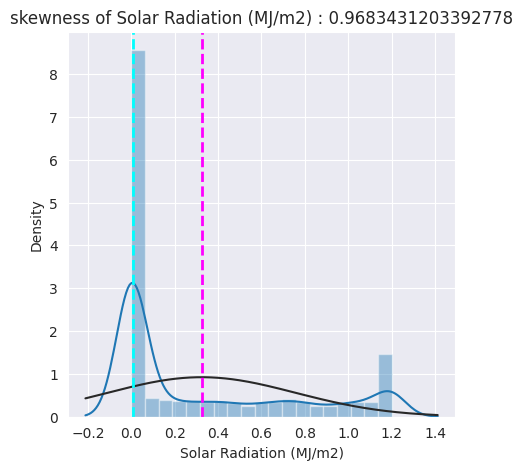

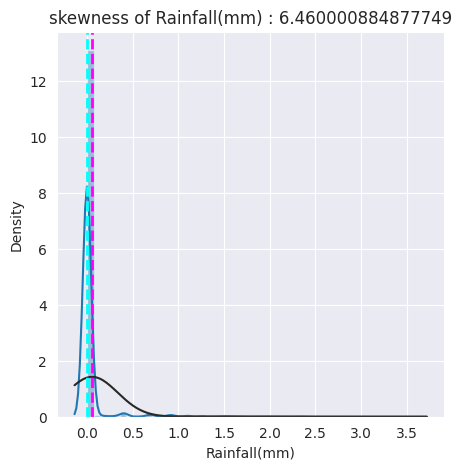

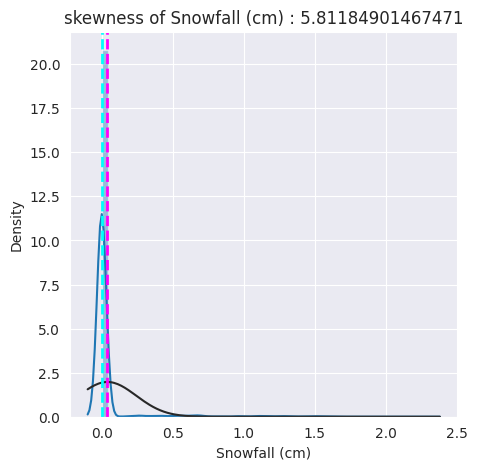

In [38]:
# Checking distribution after transformed data to normal distribution
from scipy.stats import norm
for var in num_variables:
    plt.figure(figsize=(5,5))
    ax=sns.distplot(df[var], fit=norm)
    ax.axvline(df[var].mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(df[var].median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(f'skewness of {var} : {df[var].skew()}')
    plt.show()

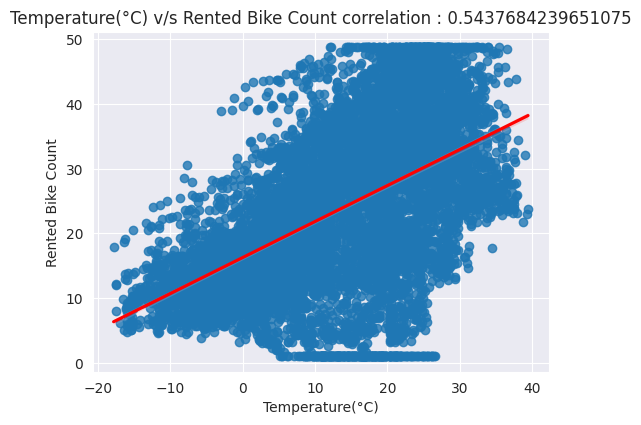

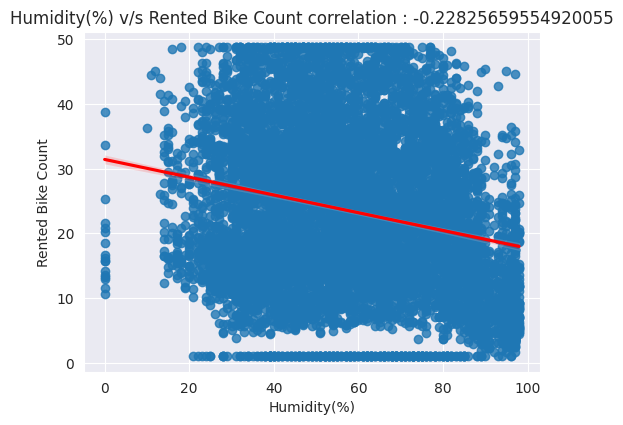

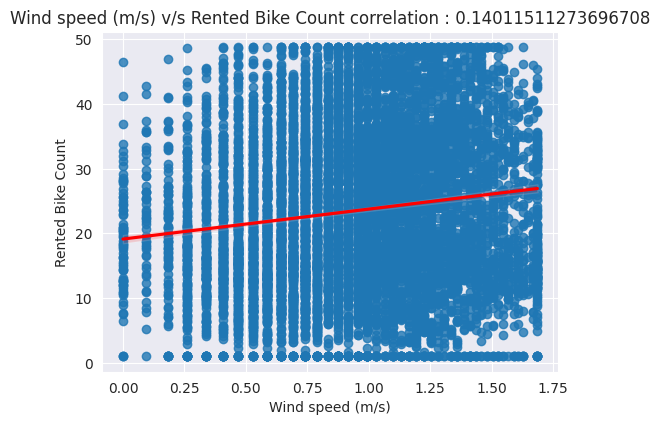

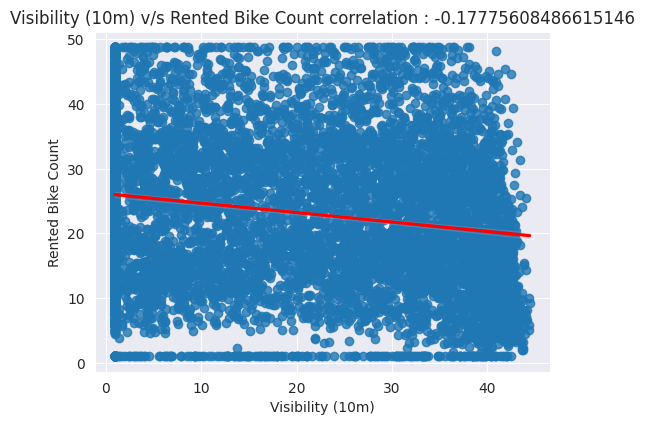

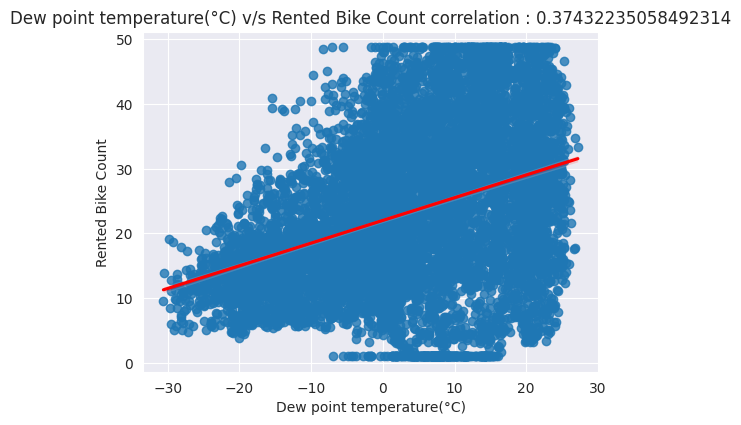

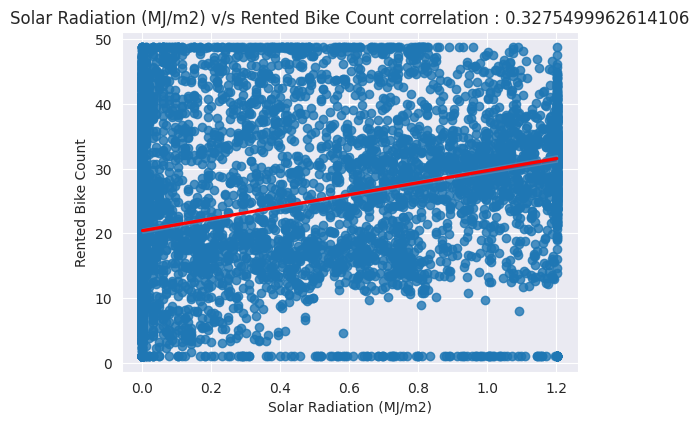

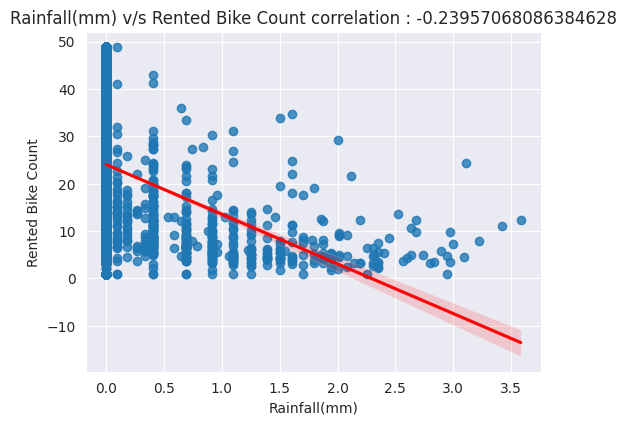

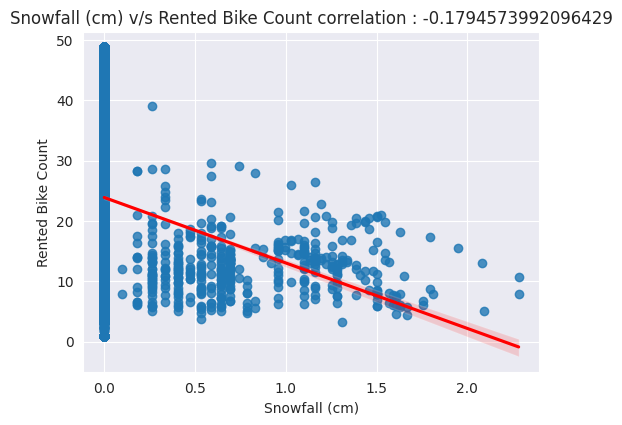

In [39]:
# Plotting regression plot 
for n, var in enumerate([var for var in num_variables if var not in ['Rented Bike Count']]):
    plt.figure(figsize=(20,15))
    plt.subplot(3,3,n+1)
    # Finding correlation of independant variables with dependant variable
    dependant_var=df['Rented Bike Count']
    independant_var=df[var]
    correlation=independant_var.corr(dependant_var)
    ax=sns.regplot(x=df[var], y=df['Rented Bike Count'], data=df, line_kws={"color": "red"})
    ax.set_title(f'{var} v/s Rented Bike Count correlation : {correlation}')
    plt.show()

## Correlation - Heatmap

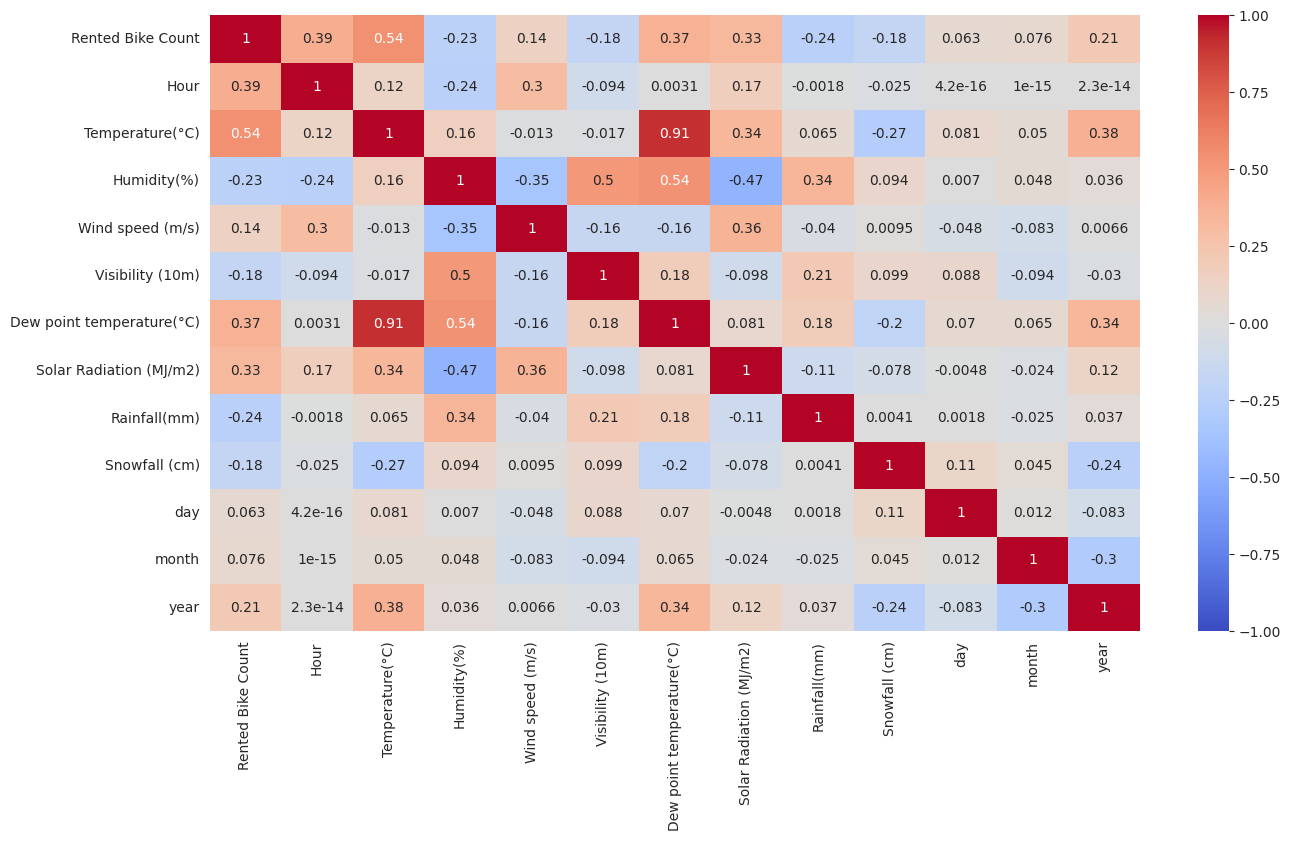

In [40]:
# Plotting a correlation heatmap for the dataset
plt.figure(figsize=(15,8))
correlation=df.corr()
sns.heatmap(correlation, vmin=-1, cmap='coolwarm', annot=True)
plt.show()

Dew point temperature (°C) and temperature (°C) have a strong correlation. A moderate correlation exists between humidity (%) and dew point temperature (°C). The variables year and Dew point temperature (°C) have a weak correlation.

In [41]:
# Variance inflation factor(VIF) to detects multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [42]:
# Calculating Variance inflation factor for dataset
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count']]])

variables         VIF
0                        Hour    4.455048
1             Temperature(°C)  187.590788
2                 Humidity(%)  188.670145
3            Wind speed (m/s)    9.666953
4            Visibility (10m)    3.894560
5   Dew point temperature(°C)  126.533084
6     Solar Radiation (MJ/m2)    3.254420
7                Rainfall(mm)    1.238572
8               Snowfall (cm)    1.198864
9                         day    4.401755
10                      month    4.742396
11                       year  371.993753

Variable year have a high variance inflation factor, so we can remove it.


In [43]:
# Dropping year feature to reduce Variance inflation factor
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','year']]])

variables        VIF
0                        Hour   4.438523
1             Temperature(°C)  26.138761
2                 Humidity(%)  13.411031
3            Wind speed (m/s)   9.519361
4            Visibility (10m)   3.873580
5   Dew point temperature(°C)  13.302493
6     Solar Radiation (MJ/m2)   3.232551
7                Rainfall(mm)   1.173579
8               Snowfall (cm)   1.186388
9                         day   4.363200
10                      month   4.677982

Variable Temperature(°C), Humidity(%) and Dew point temperature(°C) have a high variance inflation factor, so we can remove Dew point temperature(°C) variable to reduce VIF.

In [44]:
# Dropping 'Dew point temperature(°C)' feature to reduce Variance inflation factor
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','year','Dew point temperature(°C)']]])

variables        VIF
0                     Hour   4.078444
1          Temperature(°C)   3.457003
2              Humidity(%)  12.542367
3         Wind speed (m/s)   7.525551
4         Visibility (10m)   3.832421
5  Solar Radiation (MJ/m2)   2.811538
6             Rainfall(mm)   1.149039
7            Snowfall (cm)   1.173295
8                      day   3.879087
9                    month   4.328055

Variable 'Humidity(%)' have a high variance inflation factor, so we can remove it.

In [45]:
# Dropping 'Dew point temperature(°C)' feature to reduce Variance inflation factor
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','year','Dew point temperature(°C)', 'Humidity(%)']]])

variables       VIF
0                     Hour  4.072834
1          Temperature(°C)  2.693503
2         Wind speed (m/s)  6.246470
3         Visibility (10m)  2.375806
4  Solar Radiation (MJ/m2)  2.104801
5             Rainfall(mm)  1.113715
6            Snowfall (cm)  1.155757
7                      day  3.762873
8                    month  3.578675

From above, variables year,Dew point temperature(°C), and Humidity(%) have a high variance inflation factor, so we can remove them.

In [46]:
# Drop high VIF variables from dataset
df.drop(columns=['year','Dew point temperature(°C)', 'Humidity(%)'], axis=1,inplace=True)

In [47]:
df.head()

Rented Bike Count  Hour  Temperature(°C)  Wind speed (m/s)  \
0          15.968719     0             -5.2          1.163151   
1          14.317821     1             -5.5          0.587787   
2          13.190906     2             -6.0          0.693147   
3          10.392305     3             -6.2          0.641854   
4           8.888194     4             -6.0          1.193922   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0               1.0                      0.0           0.0            0.0   
1               1.0                      0.0           0.0            0.0   
2               1.0                      0.0           0.0            0.0   
3               1.0                      0.0           0.0            0.0   
4               1.0                      0.0           0.0            0.0   

  Seasons     Holiday Functioning Day  day  month  
0  Winter  No Holiday             Yes   12      1  
1  Winter  No Holiday             Yes   12      1  
2  Winter  No Holiday             Yes   12      1  
3  Winter  No Holiday             Yes   12      1  
4  Winter  No Holiday             Yes   12      1

In [48]:
# Addressing categorical variables from the dataset
categorical_variables=df.describe(include=['object']).columns
categorical_variables

Index(['Seasons', 'Holiday', 'Functioning Day'], dtype='object')

In [49]:
# Checking categories in each categorical features
for var in categorical_variables:
    print(df[var].value_counts())
    print('--'*50)

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64
----------------------------------------------------------------------------------------------------
No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64
----------------------------------------------------------------------------------------------------
Yes    8465
No      295
Name: Functioning Day, dtype: int64
----------------------------------------------------------------------------------------------------


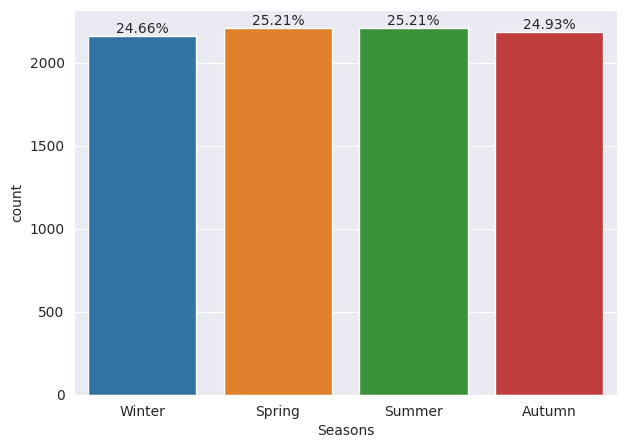

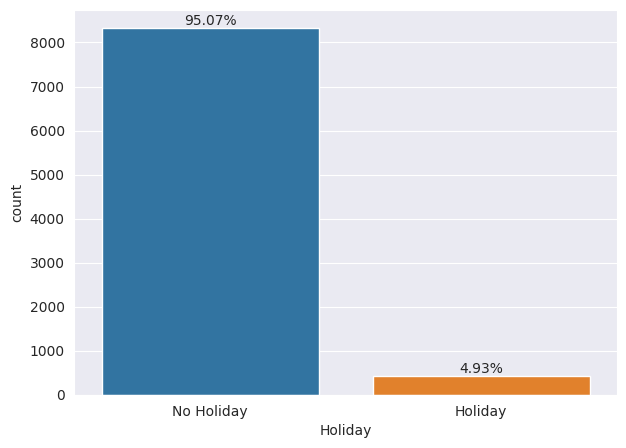

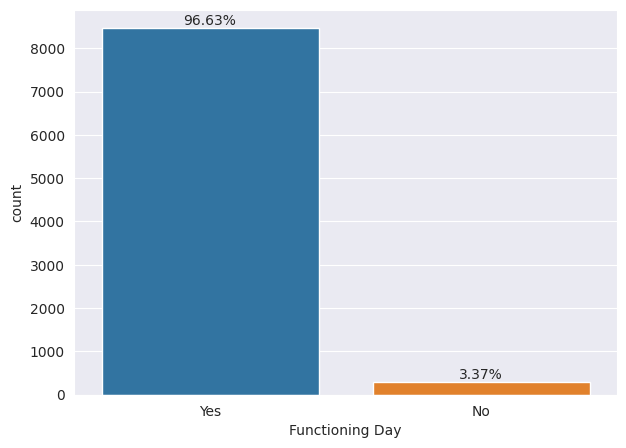

In [50]:
# Plotting count plot for each categories in categorical_variables
for var in categorical_variables:
    plt.figure(figsize=(7,5))
    plot=plt.subplot(111)
    ax=sns.countplot(x=df[var])
    annot_percent(plot)
    plt.show()

In [51]:
# Encoding categorical_variables using label encoding
# Mapping the categorical variables
df['Seasons'] = df['Seasons'].map({'Spring':1,'Summer':2,'Autumn':3,'Winter':4})
df['Holiday'] = df['Holiday'].map({'No Holiday':0,'Holiday':1})
df['Functioning Day'] = df['Functioning Day'].map({'Yes':1,'No':0})

In [52]:
# Checking basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   float64
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Wind speed (m/s)         8760 non-null   float64
 4   Visibility (10m)         8760 non-null   float64
 5   Solar Radiation (MJ/m2)  8760 non-null   float64
 6   Rainfall(mm)             8760 non-null   float64
 7   Snowfall (cm)            8760 non-null   float64
 8   Seasons                  8760 non-null   int64  
 9   Holiday                  8760 non-null   int64  
 10  Functioning Day          8760 non-null   int64  
 11  day                      8760 non-null   int64  
 12  month                    8760 non-null   int64  
dtypes: float64(7), int64(6)
memory usage: 889.8 KB


In [53]:
df.head()

Rented Bike Count  Hour  Temperature(°C)  Wind speed (m/s)  \
0          15.968719     0             -5.2          1.163151   
1          14.317821     1             -5.5          0.587787   
2          13.190906     2             -6.0          0.693147   
3          10.392305     3             -6.2          0.641854   
4           8.888194     4             -6.0          1.193922   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0               1.0                      0.0           0.0            0.0   
1               1.0                      0.0           0.0            0.0   
2               1.0                      0.0           0.0            0.0   
3               1.0                      0.0           0.0            0.0   
4               1.0                      0.0           0.0            0.0   

   Seasons  Holiday  Functioning Day  day  month  
0        4        0                1   12      1  
1        4        0                1   12      1  
2        4        0                1   12      1  
3        4        0                1   12      1  
4        4        0                1   12      1

## Data Splitting

In [54]:
# Separating independant variables and dependant variable

# Creating the dataset with all dependent variables
dependent_variable = 'Rented Bike Count'

# Creating the dataset with all independent variables
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})

# Create the data of independent variables
X = df[independent_variables].values
# Create the data of dependent variable
y = df[dependent_variable].values

In [55]:
# Splitting dataset into training set and test set
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# Checking shape of split
print(f'Shape of X_train : {X_train.shape}')
print(f'Shape of X_test : {X_test.shape}')
print(f'Shape of y_train : {y_train.shape}')
print(f'Shape of y_test : {y_test.shape}')

Shape of X_train : (7008, 12)
Shape of X_test : (1752, 12)
Shape of y_train : (7008,)
Shape of y_test : (1752,)


In [57]:
# Checking values of splitted dataset
X_train[0:5]

array([[ 0.        ,  0.        , 11.        ,  3.        ,  1.58923521,
        35.80502758, 16.        ,  1.        ,  0.70803579, 15.        ,
        13.2       ,  0.        ],
       [ 0.        ,  0.        ,  6.        ,  2.        ,  0.99325177,
        38.249183  , 29.        ,  1.        ,  0.56531381,  9.        ,
        22.9       ,  0.        ],
       [ 0.        ,  0.        , 11.        ,  3.        ,  0.87546874,
        33.64520768, 15.        ,  1.        ,  0.        , 19.        ,
        11.2       ,  0.        ],
       [ 0.        ,  0.        ,  2.        ,  4.        ,  1.09861229,
        23.8117618 ,  2.        ,  1.        ,  0.        , 23.        ,
        -2.6       ,  0.        ],
       [ 0.        ,  0.        ,  7.        ,  2.        ,  0.91629073,
        31.55946768, 18.        ,  1.        ,  0.        , 22.        ,
        27.2       ,  0.        ]])

In [58]:
# Checking values of splitted dataset
X_test[0:5]

array([[ 0.        ,  0.        , 10.        ,  2.        ,  1.02961942,
         1.41421356,  8.        ,  1.        ,  0.53062825,  8.        ,
        27.2       ,  0.        ],
       [ 0.        ,  0.        ,  7.        ,  2.        ,  1.13140211,
        34.6554469 , 20.        ,  1.        ,  1.20146967, 12.        ,
        32.6       ,  0.        ],
       [ 0.        ,  0.        ,  7.        ,  2.        ,  0.78845736,
        16.03121954,  8.        ,  1.        ,  0.98581679, 14.        ,
        34.        ,  0.        ],
       [ 0.        ,  0.        , 10.        ,  3.        ,  0.87546874,
        19.07878403, 16.        ,  1.        ,  0.10436002, 18.        ,
        16.9       ,  0.        ],
       [ 0.        ,  0.        ,  4.        ,  1.        ,  0.69314718,
        24.55605832, 18.        ,  1.        ,  0.17395331,  7.        ,
         6.4       ,  0.        ]])

In [59]:
#Transforming data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

MinMaxScaler preserves the shape of the original distribution. It doesn't meaningfully change the information embedded in the original data. So we used MinMaxScaler for scaling the dataset.

In [60]:
# Checking values of splitted dataset after normalisation
X_train[0:5]

array([[0.        , 0.        , 0.90909091, 0.66666667, 0.94238389,
        0.80265925, 0.5       , 1.        , 0.58930809, 0.65217391,
        0.54195804, 0.        ],
       [0.        , 0.        , 0.45454545, 0.33333333, 0.58897793,
        0.85902536, 0.93333333, 1.        , 0.47051858, 0.39130435,
        0.71153846, 0.        ],
       [0.        , 0.        , 0.90909091, 0.66666667, 0.51913501,
        0.75285037, 0.46666667, 1.        , 0.        , 0.82608696,
        0.50699301, 0.        ],
       [0.        , 0.        , 0.09090909, 1.        , 0.65145456,
        0.52607548, 0.03333333, 1.        , 0.        , 1.        ,
        0.26573427, 0.        ],
       [0.        , 0.        , 0.54545455, 0.33333333, 0.54334162,
        0.70474989, 0.56666667, 1.        , 0.        , 0.95652174,
        0.78671329, 0.        ]])

In [61]:
# Checking values of splitted dataset after normalisation
X_test[0:5]

array([[0.        , 0.        , 0.81818182, 0.33333333, 0.6105432 ,
        0.00955242, 0.23333333, 1.        , 0.44164931, 0.34782609,
        0.78671329, 0.        ],
       [0.        , 0.        , 0.54545455, 0.33333333, 0.67089825,
        0.77614809, 0.63333333, 1.        , 1.        , 0.52173913,
        0.88111888, 0.        ],
       [0.        , 0.        , 0.54545455, 0.33333333, 0.46753905,
        0.34664381, 0.23333333, 1.        , 0.82050909, 0.60869565,
        0.90559441, 0.        ],
       [0.        , 0.        , 0.81818182, 0.66666667, 0.51913501,
        0.41692549, 0.5       , 1.        , 0.0868603 , 0.7826087 ,
        0.60664336, 0.        ],
       [0.        , 0.        , 0.27272727, 0.        , 0.41102207,
        0.54324014, 0.56666667, 1.        , 0.14478377, 0.30434783,
        0.42307692, 0.        ]])

## Model Implementation

In [62]:
# Definig function for evaluating model

# Importing necessary librery
from sklearn import metrics
#Evaluate Metrics
def evaluate_model(true, predicted):  
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    mae = metrics.mean_absolute_error(true, predicted)
    r2_square = metrics.r2_score(true, predicted)
    print('Mean squared error (MSE):', mse)
    print('Root mean squared error (RMSE):', rmse)
    print('Mean absolute error (MAE):', mae)
    print('R2 Square', r2_square)
    print('____________________________________')


In [63]:
# Regression model to training set
from sklearn.linear_model import LinearRegression
lin_reg_tts = LinearRegression()
lin_reg_tts.fit(X_train, y_train)

LinearRegression()

In [64]:
# Score of the model
lin_reg_tts_score=lin_reg_tts.score(X_train, y_train)
print(f'Score of the model : {lin_reg_tts_score}')

Score of the model : 0.6395792892371408


In [65]:
# Intercept
lin_reg_tts.intercept_

-21.271671900902454

In [66]:
# Coefficients
lin_reg_tts.coef_

array([ -5.11490368, -38.99734556,   2.8318968 ,  -2.18209128,
         0.1281394 ,  -3.34365943,   1.1678821 ,  25.26786083,
         2.4926218 ,  12.88441975,  26.79663453,  -3.22830156])

In [67]:
# Predicting results for train and test set
y_train_pred_tts=lin_reg_tts.predict(X_train)
y_test_pred_tts=lin_reg_tts.predict(X_test)

In [68]:
# Evaluating model
print(f'Training set evaluation result\n____________________________________')
evaluate_model(y_train, y_train_pred_tts)
print(f'Test set evaluation result\n____________________________________')
evaluate_model(y_test, y_test_pred_tts)

Training set evaluation result
____________________________________
Mean squared error (MSE): 54.13971674506653
Root mean squared error (RMSE): 7.357969607511744
Mean absolute error (MAE): 5.7564148983865495
R2 Square 0.6395792892371408
____________________________________
Test set evaluation result
____________________________________
Mean squared error (MSE): 56.11071888143365
Root mean squared error (RMSE): 7.49070883704831
Mean absolute error (MAE): 5.790575510361676
R2 Square 0.6231292158906648
____________________________________


In [69]:
# Evaluating Adjusted R2
from sklearn.metrics import r2_score

print(f'Train set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred_tts)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('____________________________________')
print(f'Test set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred_tts)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Train set evaluation result
____________________________________
Adjusted R2 :  0.6389609835146026
____________________________________
Test set evaluation result
____________________________________
Adjusted R2 :  0.6205286124350512


In [70]:
# Finding mean of Residuals
print(f'Mean of Residuals for test set\n____________________________________')
residuals = y_test-y_test_pred_tts
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals for test set
____________________________________
Mean of Residuals 0.1847189380361245


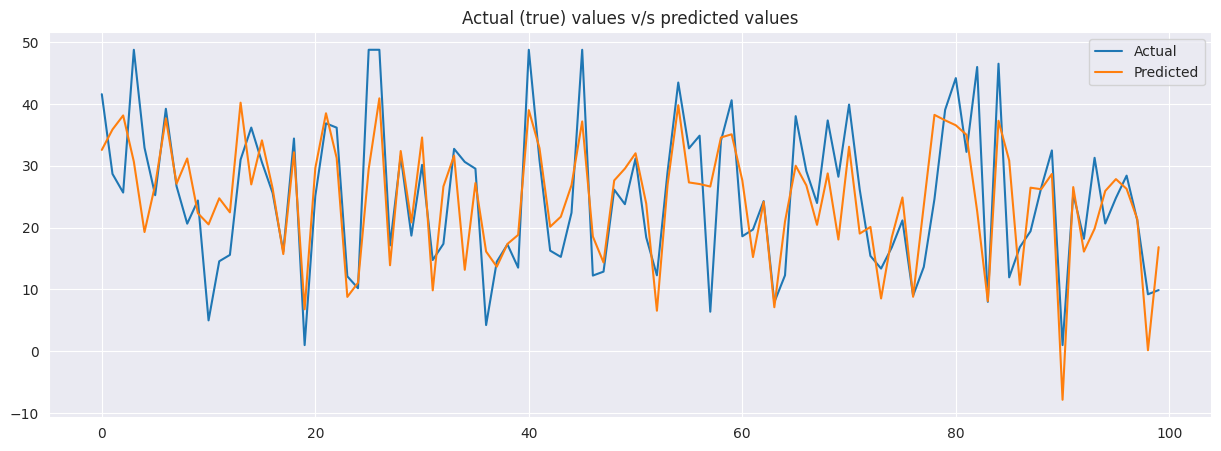

In [71]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))
plt.plot(y_test[0:100])
plt.plot(y_test_pred_tts[0:100])
plt.title('Actual (true) values v/s predicted values')
plt.legend(["Actual", "Predicted"])
plt.show()

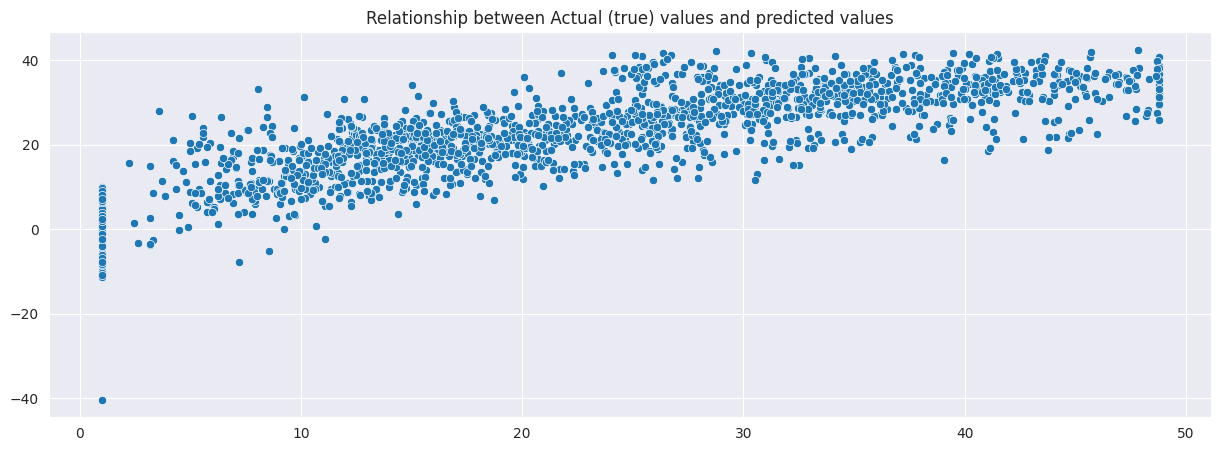

In [72]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))
sns.scatterplot(x=y_test, y=y_test_pred_tts)
plt.title('Relationship between Actual (true) values and predicted values')
plt.show()

## Cross Validation

In [73]:
# Fitting lasso regression model to training set
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.0001 , max_iter= 3000, random_state=0)
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_reg = GridSearchCV(lasso, parameters, verbose=1, scoring='neg_mean_squared_error', cv=5)
lasso_reg.fit(X_train, y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


GridSearchCV(cv=5, estimator=Lasso(alpha=0.0001, max_iter=3000, random_state=0),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error', verbose=1)

In [74]:
# Best estimators
lasso_reg_best_est=lasso_reg.best_estimator_
print(f'The best estimator values : {lasso_reg_best_est}')

The best estimator values : Lasso(alpha=0.0014, max_iter=3000, random_state=0)


In [75]:
# best fit alpha value
lasso_reg_best_params=lasso_reg.best_params_
print(f'The best fit alpha value : {lasso_reg_best_params}')

The best fit alpha value : {'alpha': 0.0014}


In [76]:
# Mean cross-validated score of the best_estimator of model
lasso_reg_score=lasso_reg.best_score_
print(f" The negative mean squared error is: {lasso_reg_score}")

 The negative mean squared error is: -54.423584497375465


In [77]:
# Predicting results for train and test set
y_train_pred=lasso_reg.predict(X_train)
y_test_pred=lasso_reg.predict(X_test)

In [78]:
# Evaluating model
print(f'Training set evaluation result\n____________________________________')
evaluate_model(y_train, y_train_pred)
print(f'Test set evaluation result\n____________________________________')
evaluate_model(y_test, y_test_pred)

Training set evaluation result
____________________________________
Mean squared error (MSE): 54.14053601522764
Root mean squared error (RMSE): 7.358025279599659
Mean absolute error (MAE): 5.757348479606212
R2 Square 0.6395738351647606
____________________________________
Test set evaluation result
____________________________________
Mean squared error (MSE): 56.10159836410152
Root mean squared error (RMSE): 7.49010002363797
Mean absolute error (MAE): 5.79060923764242
R2 Square 0.6231904743558381
____________________________________


In [79]:
# Evaluating Adjusted R2
from sklearn.metrics import r2_score

print(f'Train set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('____________________________________')
print(f'Test set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Train set evaluation result
____________________________________
Adjusted R2 :  0.6389555200857009
____________________________________
Test set evaluation result
____________________________________
Adjusted R2 :  0.6205902936153378


In [80]:
# Finding mean of Residuals
print(f'Mean of Residuals for test set\n____________________________________')
residuals = y_test-y_test_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals for test set
____________________________________
Mean of Residuals 0.18496168677177557


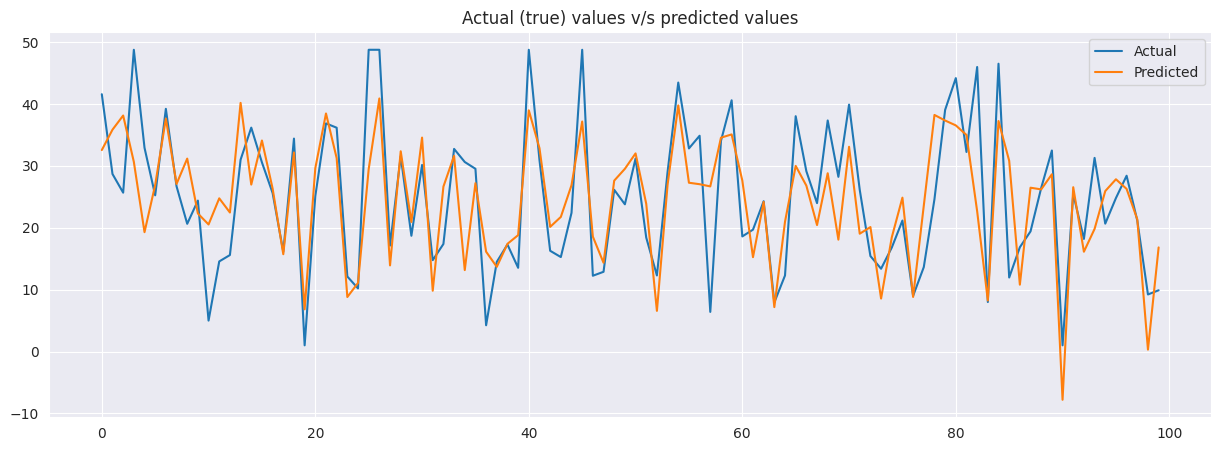

In [81]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))
plt.plot(y_test[0:100])
plt.plot(y_test_pred[0:100])
plt.title('Actual (true) values v/s predicted values')
plt.legend(["Actual", "Predicted"])
plt.show()

In [82]:
# Fitting ridge regression model to training set
from sklearn.linear_model import Ridge
ridge = Ridge(random_state=0)
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
ridge_reg = GridSearchCV(ridge, parameters, verbose=1, scoring='neg_mean_squared_error', cv=5)
ridge_reg.fit(X_train, y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


GridSearchCV(cv=5, estimator=Ridge(random_state=0),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error', verbose=1)

In [83]:
# Best estimators
ridge_reg_best_est=ridge_reg.best_estimator_
print(f'The best estimator values : {ridge_reg_best_est}')

The best estimator values : Ridge(alpha=1, random_state=0)


In [84]:
# best fit alpha value
ridge_reg_best_params=ridge_reg.best_params_
print(f'The best fit alpha value : {ridge_reg_best_params}')

The best fit alpha value : {'alpha': 1}


In [85]:
# Mean cross-validated score of the best_estimator of model
ridge_reg_score=ridge_reg.best_score_
print(f" The negative mean squared error is: {ridge_reg_score}")

 The negative mean squared error is: -54.42323488197027


In [86]:
# Evaluating model
print(f'Training set evaluation result\n____________________________________')
evaluate_model(y_train, y_train_pred)
print(f'Test set evaluation result\n____________________________________')
evaluate_model(y_test, y_test_pred)

Training set evaluation result
____________________________________
Mean squared error (MSE): 54.14053601522764
Root mean squared error (RMSE): 7.358025279599659
Mean absolute error (MAE): 5.757348479606212
R2 Square 0.6395738351647606
____________________________________
Test set evaluation result
____________________________________
Mean squared error (MSE): 56.10159836410152
Root mean squared error (RMSE): 7.49010002363797
Mean absolute error (MAE): 5.79060923764242
R2 Square 0.6231904743558381
____________________________________


In [87]:
# Finding mean of Residuals
print(f'Mean of Residuals for test set\n____________________________________')
residuals = y_test-y_test_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals for test set
____________________________________
Mean of Residuals 0.18496168677177557


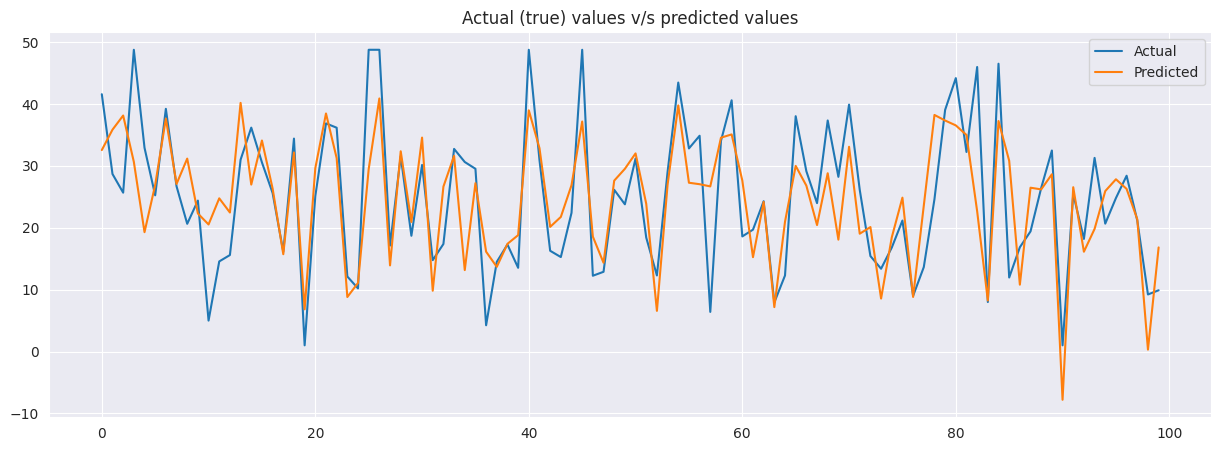

In [88]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))
plt.plot(y_test[0:100])
plt.plot(y_test_pred[0:100])
plt.title('Actual (true) values v/s predicted values')
plt.legend(["Actual", "Predicted"])
plt.show()

Decision Tree

In [89]:
# Fitting Decision tree Regression model to training set
from sklearn.tree import DecisionTreeRegressor
dtree_tts=DecisionTreeRegressor(criterion='squared_error',max_leaf_nodes=10, random_state=0)
dtree_tts.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=10, random_state=0)

In [90]:
# Score of the model
dtree_tts_score=dtree_tts.score(X_train, y_train)
print(f'Score of the model : {dtree_tts_score}')

Score of the model : 0.721740806076178


In [91]:
# Evaluating model
print(f'Training set evaluation result\n____________________________________')
evaluate_model(y_train, y_train_pred_tts)
print(f'Test set evaluation result\n____________________________________')
evaluate_model(y_test, y_test_pred_tts)

Training set evaluation result
____________________________________
Mean squared error (MSE): 54.13971674506653
Root mean squared error (RMSE): 7.357969607511744
Mean absolute error (MAE): 5.7564148983865495
R2 Square 0.6395792892371408
____________________________________
Test set evaluation result
____________________________________
Mean squared error (MSE): 56.11071888143365
Root mean squared error (RMSE): 7.49070883704831
Mean absolute error (MAE): 5.790575510361676
R2 Square 0.6231292158906648
____________________________________


In [92]:
# Evaluating Adjusted R2
from sklearn.metrics import r2_score

print(f'Train set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred_tts)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('____________________________________')
print(f'Test set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred_tts)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Train set evaluation result
____________________________________
Adjusted R2 :  0.6389609835146026
____________________________________
Test set evaluation result
____________________________________
Adjusted R2 :  0.6205286124350512


In [93]:
# Finding mean of Residuals
print(f'Mean of Residuals for test set\n____________________________________')
residuals = y_test-y_test_pred_tts
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals for test set
____________________________________
Mean of Residuals 0.1847189380361245


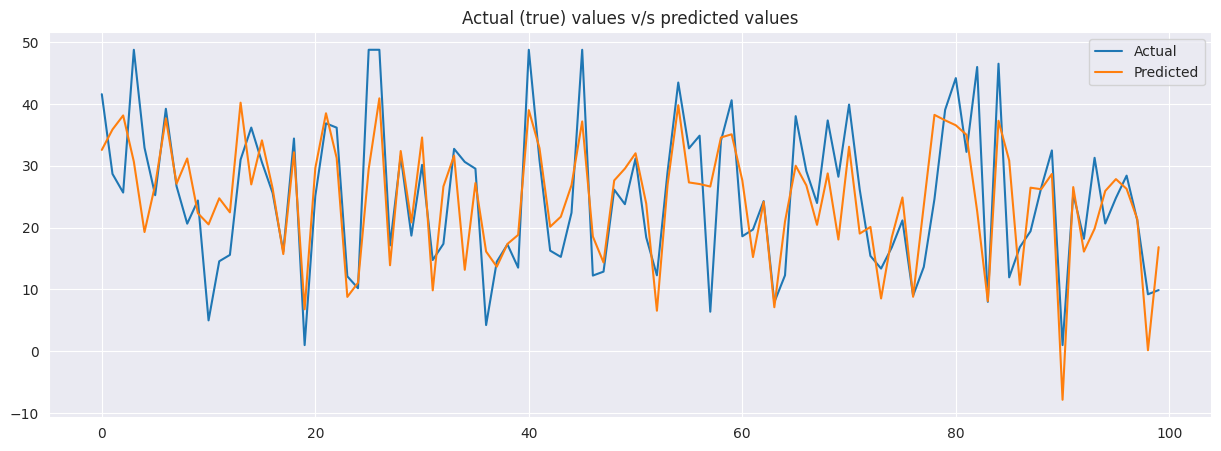

In [94]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))
plt.plot(y_test[0:100])
plt.plot(y_test_pred_tts[0:100])
plt.title('Actual (true) values v/s predicted values')
plt.legend(["Actual", "Predicted"])
plt.show()

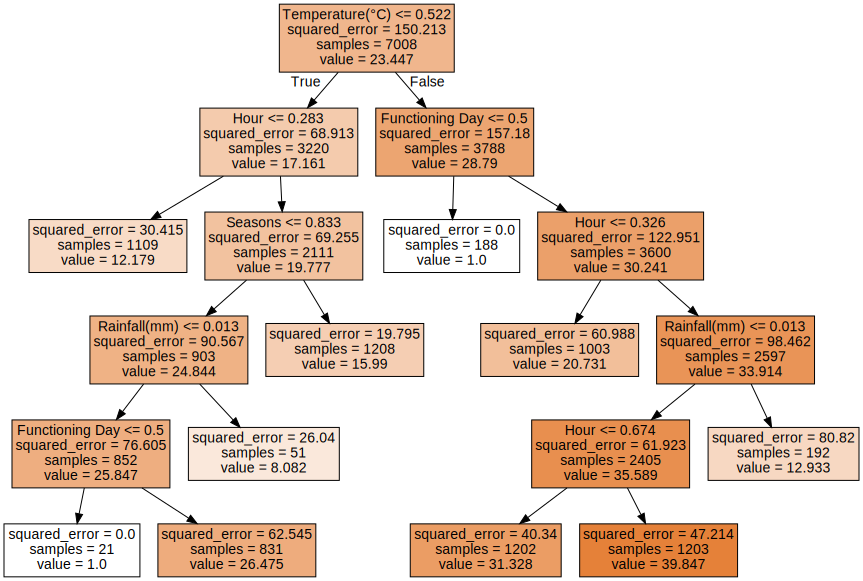

In [95]:
# Visulaizing Decision Tree

# Importing libraries
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

# Visualizing graph
graph = Source(tree.export_graphviz(dtree_tts, out_file=None
   , feature_names=df[independent_variables].columns
   , filled = True))
display(SVG(graph.pipe(format='svg')))

In [96]:
# Fitting Decision tree regression model to training set
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=0)
param_dict = {'max_depth':[4,6,8],
              'min_samples_split':[50,100,150],
              'min_samples_leaf':[40,50]}
dtree_reg = GridSearchCV(dtree, param_dict, verbose=1, scoring='neg_mean_squared_error', cv=5)
dtree_reg.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150]},
             scoring='neg_mean_squared_error', verbose=1)

In [97]:
# Best estimators
dtree_reg_best_est=dtree_reg.best_estimator_
print(f'The best estimator values : {dtree_reg_best_est}')

The best estimator values : DecisionTreeRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50,
                      random_state=0)


In [98]:
# best fit values
dtree_reg_best_params=dtree_reg.best_params_
print(f'The best fit values: {dtree_reg_best_params}')

The best fit values: {'max_depth': 8, 'min_samples_leaf': 40, 'min_samples_split': 50}


In [99]:
# Mean cross-validated score of the best_estimator of model
dtree_reg_score=dtree_reg.best_score_
print(f" The negative mean squared error is: {dtree_reg_score}")

 The negative mean squared error is: -32.76097945522947


In [100]:
# Evaluating model
print(f'Training set evaluation result\n____________________________________')
evaluate_model(y_train, y_train_pred)
print(f'Test set evaluation result\n____________________________________')
evaluate_model(y_test, y_test_pred)

Training set evaluation result
____________________________________
Mean squared error (MSE): 54.14053601522764
Root mean squared error (RMSE): 7.358025279599659
Mean absolute error (MAE): 5.757348479606212
R2 Square 0.6395738351647606
____________________________________
Test set evaluation result
____________________________________
Mean squared error (MSE): 56.10159836410152
Root mean squared error (RMSE): 7.49010002363797
Mean absolute error (MAE): 5.79060923764242
R2 Square 0.6231904743558381
____________________________________


In [101]:
# Evaluating Adjusted R2
from sklearn.metrics import r2_score

print(f'Train set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('____________________________________')
print(f'Test set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Train set evaluation result
____________________________________
Adjusted R2 :  0.6389555200857009
____________________________________
Test set evaluation result
____________________________________
Adjusted R2 :  0.6205902936153378


In [102]:
# Finding mean of Residuals
print(f'Mean of Residuals for test set\n____________________________________')
residuals = y_test-y_test_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals for test set
____________________________________
Mean of Residuals 0.18496168677177557


Random Forest

In [103]:
# Fitting Random Forest Regression model to training set
from sklearn.ensemble import RandomForestRegressor
rf_tts=RandomForestRegressor(criterion='squared_error',max_leaf_nodes=10, random_state=0)
rf_tts.fit(X_train, y_train)

RandomForestRegressor(max_leaf_nodes=10, random_state=0)

In [104]:
# Score of the model
rf_tts_score=rf_tts.score(X_train, y_train)
print(f'Score of the model : {rf_tts_score}')

Score of the model : 0.7537562647066289


In [105]:
# Evaluating model
print(f'Training set evaluation result\n____________________________________')
evaluate_model(y_train, y_train_pred_tts)
print(f'Test set evaluation result\n____________________________________')
evaluate_model(y_test, y_test_pred_tts)

Training set evaluation result
____________________________________
Mean squared error (MSE): 54.13971674506653
Root mean squared error (RMSE): 7.357969607511744
Mean absolute error (MAE): 5.7564148983865495
R2 Square 0.6395792892371408
____________________________________
Test set evaluation result
____________________________________
Mean squared error (MSE): 56.11071888143365
Root mean squared error (RMSE): 7.49070883704831
Mean absolute error (MAE): 5.790575510361676
R2 Square 0.6231292158906648
____________________________________


In [106]:
# Evaluating Adjusted R2
from sklearn.metrics import r2_score

print(f'Train set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred_tts)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('____________________________________')
print(f'Test set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred_tts)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Train set evaluation result
____________________________________
Adjusted R2 :  0.6389609835146026
____________________________________
Test set evaluation result
____________________________________
Adjusted R2 :  0.6205286124350512


In [107]:
# Finding mean of Residuals
print(f'Mean of Residuals for test set\n____________________________________')
residuals = y_test-y_test_pred_tts
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals for test set
____________________________________
Mean of Residuals 0.1847189380361245


In [108]:
# Fitting Random Forest regression model to training set
from sklearn.ensemble import RandomForestRegressor
rf_cv = RandomForestRegressor(random_state=42)
param_dict = {'n_estimators':[50,80,100],
              'max_depth':[4,6,8],
              'min_samples_split':[50,100,150],
              'min_samples_leaf':[40,50]}
rf_reg = GridSearchCV(rf_cv, param_dict, verbose=1, scoring='neg_mean_squared_error', cv=5)
rf_reg.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [109]:
# Best estimators
rf_reg_best_est=rf_reg.best_estimator_
print(f'The best estimator values : {rf_reg_best_est}')

The best estimator values : RandomForestRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50,
                      random_state=42)


In [110]:
# best fit values
rf_reg_best_params=rf_reg.best_params_
print(f'The best fit values: {rf_reg_best_params}')

The best fit values: {'max_depth': 8, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 100}


In [111]:
# Mean cross-validated score of the best_estimator of model
rf_reg_score=rf_reg.best_score_
print(f" The negative mean squared error is: {rf_reg_score}")

 The negative mean squared error is: -26.457818782361677


In [112]:
# Evaluating model
print(f'Training set evaluation result\n____________________________________')
evaluate_model(y_train, y_train_pred)
print(f'Test set evaluation result\n____________________________________')
evaluate_model(y_test, y_test_pred)

Training set evaluation result
____________________________________
Mean squared error (MSE): 54.14053601522764
Root mean squared error (RMSE): 7.358025279599659
Mean absolute error (MAE): 5.757348479606212
R2 Square 0.6395738351647606
____________________________________
Test set evaluation result
____________________________________
Mean squared error (MSE): 56.10159836410152
Root mean squared error (RMSE): 7.49010002363797
Mean absolute error (MAE): 5.79060923764242
R2 Square 0.6231904743558381
____________________________________


In [113]:
# Evaluating Adjusted R2
from sklearn.metrics import r2_score

print(f'Train set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('____________________________________')
print(f'Test set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Train set evaluation result
____________________________________
Adjusted R2 :  0.6389555200857009
____________________________________
Test set evaluation result
____________________________________
Adjusted R2 :  0.6205902936153378


In [114]:
# Finding mean of Residuals
print(f'Mean of Residuals for test set\n____________________________________')
residuals = y_test-y_test_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals for test set
____________________________________
Mean of Residuals 0.18496168677177557


XGBOOST

In [115]:
# Fitting XGBoost regression model to training set
import xgboost as xgb
xgb_cv = xgb.XGBRegressor(random_state=0)

param_dict = {'n_estimators':[50,80,100],
              'max_depth':[4,6,8],
              'min_samples_split':[50,100,150],
              'min_samples_leaf':[40,50]}
xgb_reg = GridSearchCV(xgb_cv, param_dict, verbose=1, scoring='neg_mean_squared_error', cv=3)
xgb_reg.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[16:50:53] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[16:50:55] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[16:50:55] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[16:50:55] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[16:50:55] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[16:50:55] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[16:50:55] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[16:50:56] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[16:50:56] WARNING

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=0, ...),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [116]:
# Best estimators
xgb_reg_best_est=xgb_reg.best_estimator_
print(f'The best estimator values : {xgb_reg_best_est}')

The best estimator values : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, min_samples_leaf=40, min_samples_split=50,
             missing=nan, monotone_constraints=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)


In [117]:
# best fit values
xgb_reg_best_params=xgb_reg.best_params_
print(f'The best fit values: {xgb_reg_best_params}')

The best fit values: {'max_depth': 6, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 100}


In [118]:
# Mean cross-validated score of the best_estimator of model
xgb_reg_score=xgb_reg.best_score_
print(f" The negative mean squared error is: {xgb_reg_score}")

 The negative mean squared error is: -16.347133350499544


In [119]:
# Evaluating model
print(f'Training set evaluation result\n____________________________________')
evaluate_model(y_train, y_train_pred)
print(f'Test set evaluation result\n____________________________________')
evaluate_model(y_test, y_test_pred)

Training set evaluation result
____________________________________
Mean squared error (MSE): 54.14053601522764
Root mean squared error (RMSE): 7.358025279599659
Mean absolute error (MAE): 5.757348479606212
R2 Square 0.6395738351647606
____________________________________
Test set evaluation result
____________________________________
Mean squared error (MSE): 56.10159836410152
Root mean squared error (RMSE): 7.49010002363797
Mean absolute error (MAE): 5.79060923764242
R2 Square 0.6231904743558381
____________________________________


In [120]:
# Evaluating Adjusted R2
from sklearn.metrics import r2_score

print(f'Train set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('____________________________________')
print(f'Test set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Train set evaluation result
____________________________________
Adjusted R2 :  0.6389555200857009
____________________________________
Test set evaluation result
____________________________________
Adjusted R2 :  0.6205902936153378


In [121]:
# Finding mean of Residuals
print(f'Mean of Residuals for test set\n____________________________________')
residuals = y_test-y_test_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals for test set
____________________________________
Mean of Residuals 0.18496168677177557


## Comparing Different Models based on the Evaluation Metrics

In [122]:
# import module
from tabulate import tabulate
 
# Assign data
mydata = [
    ['Linear regression',"56.11071", "7.49070", '5.79057','0.623129','0.6205286','0.184718'],
    ['Lasso (L1)',"56.1015", "7.490094", '5.7906075','0.62319105','0.62059087','0.184956'],
    ['Ridge (L2)',"56.108121", "7.4905354", '5.791172','0.623146','0.6205401','0.184706'],
    ['ElasticNet',"56.1078", "7.49051", '5.79069','0.623148','0.620548','0.184721'],
    ['Random Forest',"26.070", "5.1034", '3.6223','0.8248','0.8237','0.2243'],
    ['XGBoost',"14.19", "3.80", '2.43','0.9026','0.9007','0.1463']
]
 
# Create header for table
head = ['ML Model Name',"MSE", "RMSE", 'MAE','R-squared','Ad. R-squared','Mean of Residuals']
 
# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))
print('Note : Highest evaluation metric are taken into consideration between train_test_split and cross validation from each model')

+-------------------+---------+---------+---------+-------------+-----------------+---------------------+
| ML Model Name     |     MSE |    RMSE |     MAE |   R-squared |   Ad. R-squared |   Mean of Residuals |
+===================+=========+=========+=========+=============+=================+=====================+
| Linear regression | 56.1107 | 7.4907  | 5.79057 |    0.623129 |        0.620529 |            0.184718 |
+-------------------+---------+---------+---------+-------------+-----------------+---------------------+
| Lasso (L1)        | 56.1015 | 7.49009 | 5.79061 |    0.623191 |        0.620591 |            0.184956 |
+-------------------+---------+---------+---------+-------------+-----------------+---------------------+
| Ridge (L2)        | 56.1081 | 7.49054 | 5.79117 |    0.623146 |        0.62054  |            0.184706 |
+-------------------+---------+---------+---------+-------------+-----------------+---------------------+
| ElasticNet        | 56.1078 | 7.49051 | 5.79

## Conclusion



Customers favour rental motorcycles equally in all seasons.
When there are no holidays, customers choose to rent motorcycles. Customers hardly ever use the bikes they rent while traveling on holiday.
Nearly all consumers preferred to rent bikes during functional hours.
Bicycle rentals are popular all month long.
Renting bicycles was not very popular in 2017, but it increased by 83.02 percent in 2018.
At night, customers do not prefer to use rented bikes.
Customers do not prefer rented bikes in the mornings 4 and 5, but from 7, 8, and 9, the use of rented bikes increases, possibly due to working people going to the office, and it is the same in the evenings 5, 6, and 7, because people are travelling from the office to home. Overall, the rented bike was the most frequently used during office in and out times.
Customers mostly use rented bikes for transportation in the evening.
Customers who travel most commonly use rented bikes in the morning at 8 a.m. and in the evening at 6 p.m.
When the humidity level is between 10% and 18%, people prefer to rent bikes.
wind speed is between 2 m/s and 3.5 m/s, people consistently use rented bikes, and it is at its peak when wind speed is normal, which is 3.2 m/s.
Renting a bike is the best option for customers in dew point temperatures ranging from 12°C to 18°C. The use of a rented bike increases with increasing dew point temperatures, but it still reaches normal dew point temperatures.
According to the graph, solar radiation has no effect on customer use of rented bikes.
When it's not raining, people prefer rental bikes the most.
When there is no snowfall, most people opt to rent bikes. However, the majority of customers prefer to rent bikes when it snows up to 4 cm.
In the first 10 days of the month, most rented bikes are used by customers. Customers consistently use rented bikes in the last 15 days of the month.
In June, most rented bikes are used through the year, followed by October. Customers' use of rent bikes is at its peak from April to September.
The count of rented bikes on that day is unaffected by the day's visibility, but when visibility exceeds 1750, use of rented bikes increases more than usual.
During the summer and autumn seasons, most people rent bikes. During the winter, fewer people choose to rent bikes.
Even when there is no holiday other than a holiday, people rent bikes. The use of rented bikes on holidays is lower than on non-holiday days.
Almost every rented bike is used during its functional hours.
The use of rented bikes increased by three times in 2018 compared to 2017.








## The XGBoost regression model has the highest R-squared score, the lowest Root Mean Squared Error (RMSE), and has very close to having zero mean of residuals.

## As a result of the model's high accuracy, low error, and zero mean of residuals, the XGBoost regression model is the ideal and well-trained model for forecasting the number of rented bikes required per hour.